# 1. PENJELASAN

**Uber and Lyft Dataset Boston**, <br>
The dataset contains information related to rides from two popular ride-sharing services, **Uber and Lyft**. It includes details about each ride, such as the ride's timestamp, source, destination, cab type, product ID, name, price, distance, surge multiplier, and more. <br>

### 1.1. Project Description
The goal of this project is to predict the prices of Uber and Lyft rides based on various features such as time, location, weather conditions, and ride details. The project involves the use of machine learning models to make predictions and provide insights into the factors influencing ride prices.

### 1.2. Dataset
The dataset used in this project contains information about Uber and Lyft rides, including features such as hour, day, month, source, destination, cab type, product ID, name, distance, surge multiplier, temperature, short summary, precipitation intensity, humidity, wind speed, visibility, dew point, pressure, wind bearing, cloud cover, UV index, ozone, moon phase, and precipitation intensity max.

### 1.3. Data Preprocessing
- Handling missing values.
- Encoding categorical variables.
- Scaling numerical features using robust scaling.

### 1.4. Model Training
Two main models are used for this project:
- **Surge Multiplier Prediction:** Logistic Regression model (`lgr`) is trained to predict surge multipliers based on features like cab type, source, destination, hour, temperature, and short summary.
- **Price Prediction:** Linear Regression model (`lr`) is trained to predict ride prices based on surge multiplier, name, cab type, distance, and short summary.

### 1.5. Flask Web Application
A Flask web application is created to provide a user interface for predicting ride prices. Users can input ride details, and the application utilizes the trained models to predict the price.

### 1.6. Model Export and Deployment
The trained models are exported using Pickle for future use. The Flask application is deployed to provide an accessible platform for users to make ride price predictions.


# 2. IMPORT LIBRARY

1. Importing Libraries:
   - `numpy` and `pandas` are imported for data manipulation.
   - `warnings` is imported to suppress warnings.
   - `seaborn` and `matplotlib.pyplot` are used for data visualization.
   - `scipy.stats` is imported for statistical operations.
   - We set the option to display all columns in the DataFrame.

2. Data Preprocessing for Classification Problems:
   - In this code snippet, the code is prepared for solving classification problems.

3. Model Selection:
   - Linear Regression (`LinearRegression`) from scikit-learn is imported for potential use in classification problems.

4. Splitting and Standardizing Datasets:
   - The code uses the `Winsorizer` from the `feature_engine.outliers` module to handle outliers in the data.
   - `RobustScaler` from scikit-learn is imported for robust feature scaling.
   - The `train_test_split` function from scikit-learn is imported to split the dataset into training and testing sets.

5. Model Evaluation:
   - `mean_squared_error` from scikit-learn is imported to evaluate the model's performance using the mean squared error metric.

6. Warnings Suppression:
   - The code uses `warnings.filterwarnings("ignore")` to suppress warning messages in the code execution.

7. Display Options:
   - `pd.set_option("display.max.columns", None)` is used to display all columns when printing DataFrames.

This code appears to be a setup for working on classification problems. It imports necessary libraries, sets display options, and prepares for data preprocessing, model selection, and evaluation. The specific details and functionality would depend on the rest of the code, which is not provided here.

It's important to note that the code may be incomplete and might require additional components for a complete analysis or modeling task.


In [928]:
import numpy as np
import pandas as pd 
import warnings
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from dython.nominal import associations

from scipy import stats

warnings.filterwarnings("ignore")

pd.set_option("display.max.columns", None)

# For Classification Problems
from sklearn.linear_model import LinearRegression

# Split Dataset and Standarize the Datasets
from sklearn.preprocessing import LabelEncoder
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# Evaluate  Models
from sklearn.metrics import mean_squared_error

# 3. DATA LOADING

1. Data Loading:
   - The code snippet is responsible for loading a dataset from a CSV file.
   - `pd.read_csv('../Dataset/rideshare_kaggle.csv')` reads the CSV file located in the '../Dataset' directory and stores it as a DataFrame named 'df'. This is done using the pandas library.

2. Dataset Shape:
   - `df.shape` is used to retrieve and display the dimensions of the dataset. It returns a tuple of (number of rows, number of columns) in the DataFrame 'df'.

3. Dataset Information:
   - `df.info()` is employed to obtain a summary of the dataset's information, including the data types of each column, the number of non-null entries, and memory usage. This provides an overview of the dataset's structure.

4. Descriptive Statistics:
   - `df.describe()` generates basic descriptive statistics for the numerical columns in the dataset. It includes count, mean, standard deviation, minimum, quartiles, and maximum values for each numeric column. This helps in understanding the distribution and characteristics of the data.

This code is the initial step in the data analysis process, where the dataset is loaded, and basic information about its shape, data types, and summary statistics is displayed. Further analysis and data processing can be performed based on this initial exploration.


In [929]:
df = pd.read_csv('../../Dataset/rideshare_kaggle.csv')
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,15436653

In [930]:
df.shape

(693071, 57)

In [931]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [932]:
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

In [933]:
df['day'].value_counts()

27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: day, dtype: int64

In [934]:
df['price'].value_counts().sort_index()

2.5       211
3.0      5543
3.5      5063
4.5       419
5.0     14084
        ...  
87.5        4
89.0       11
89.5        1
92.0        9
97.5        1
Name: price, Length: 147, dtype: int64

In [935]:
df['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

# 4. DATA CLEANING

1. Correlation Plotting Function:
   - The `plot_corr` function is defined to create a correlation matrix heatmap plot for the DataFrame 'df'.
   - It calculates the correlation between all numeric columns in 'df', creates a correlation matrix, and visualizes it as a heatmap.
   - The size of the plot can be customized using the 'size' parameter.

2. Initial Correlation Plot:
   - The code uses the 'plot_corr' function to generate an initial correlation matrix plot for the entire dataset. This plot helps in visualizing the pairwise correlations between numerical features.

3. Data Cleaning:
   - The code proceeds with data cleaning by removing several columns from the DataFrame 'df'. The columns to be dropped include various time-related and descriptive features that may not be relevant for analysis or modeling.
   - The 'drop' method is used to eliminate the specified columns from the DataFrame.

4. Correlation Plot after Data Cleaning:
   - After removing the specified columns, the 'plot_corr' function is called again to generate a new correlation matrix plot for the modified DataFrame 'df'. This allows for visualizing the updated correlations between the remaining numeric features.

These steps are part of the data cleaning and preparation process. The initial correlation plot provides insights into the relationships between variables, and the subsequent removal of unnecessary columns simplifies the dataset for further analysis or modeling.

Note that the code provided is focused on data exploration and cleaning, and additional data preprocessing may be required depending on the specific analysis or modeling tasks.


In [936]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [937]:
#The `plot_corr` function is used to create a correlation matrix heatmap plot for a given DataFrame, 
#visualizing the pairwise correlations between numeric columns within the dataset. 
#It provides a quick and intuitive way to assess the relationships between variables in the data.
def plot_corr(df, size=14):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

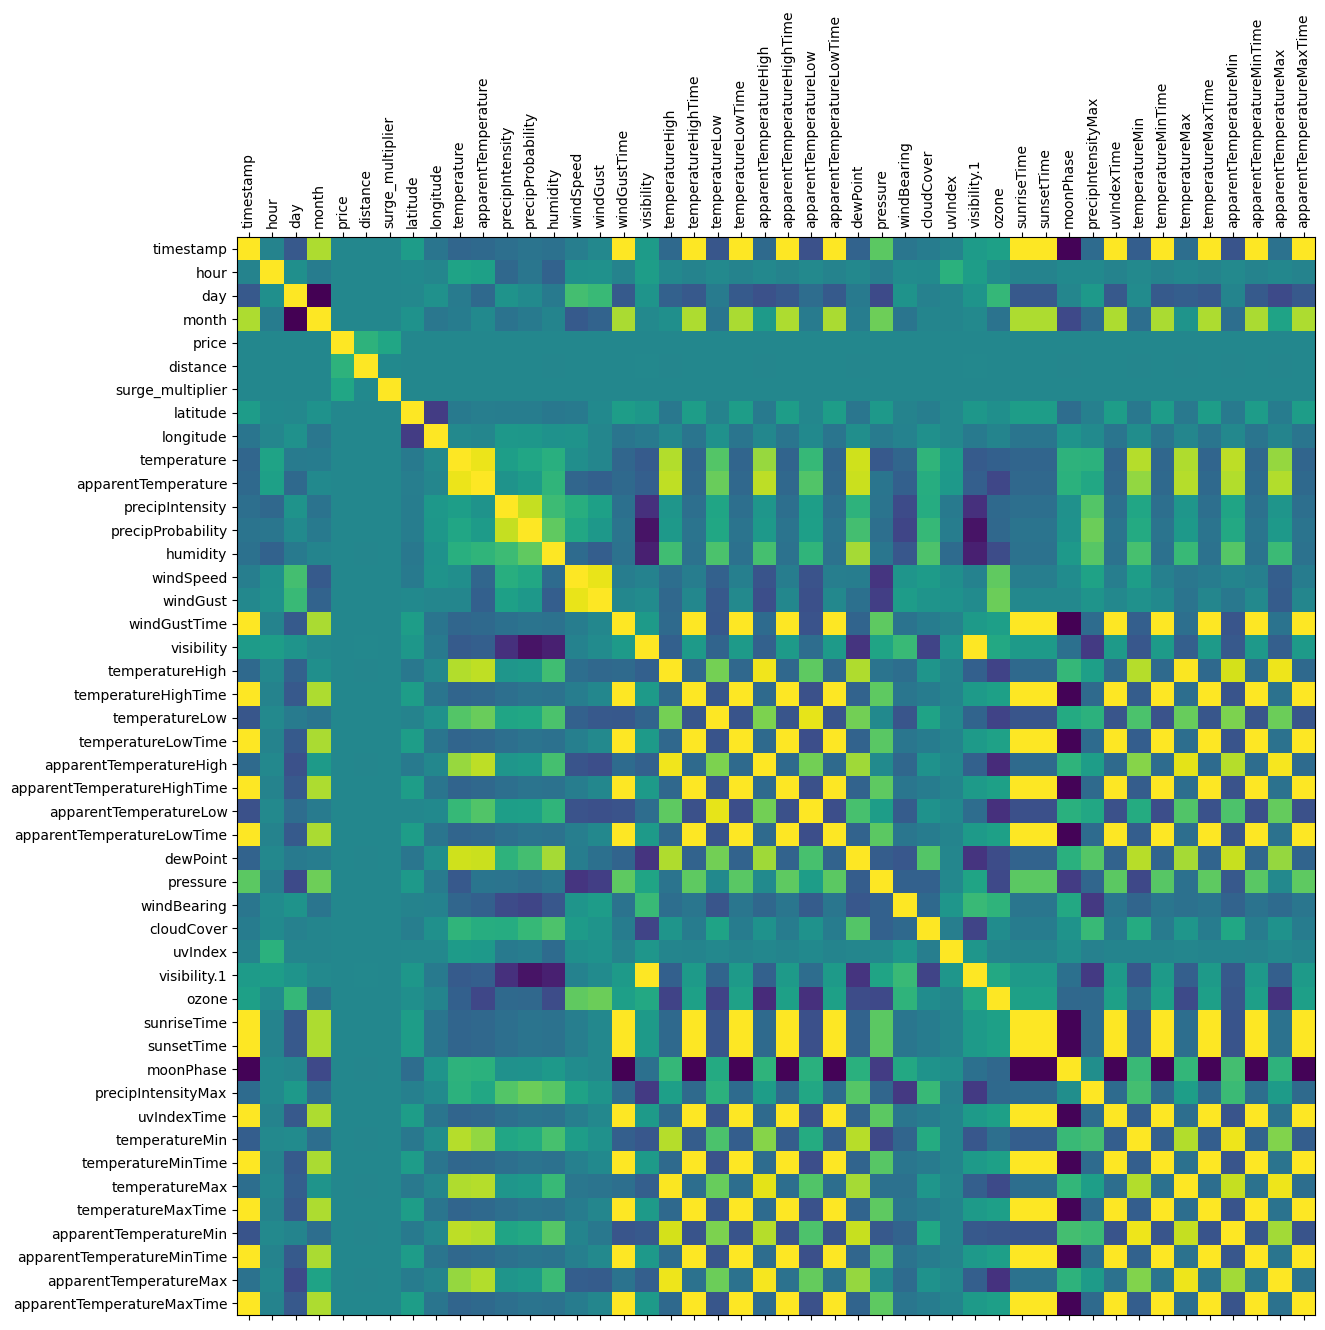

In [938]:
plot_corr(df)

In [939]:
df.sample()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
396028,042e0518-6452-451a-b1cf-a73d15bb5326,1.543447e+09,23,28,11,2018-11-28 23:17:07,America/New_York,North Station,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,10.5,1.08,1.0,42.2148,-71.033,39.35,33.0,Overcast,Mostly cloudy throughout the day.,0.0,0.0,0.69,9.63,14.39,1543446000,10.0,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,cloudy,29.86,995.3,293,1.0,0,10.0,355.0,1543405904,1543439738,0.72,0.0001,1543420800,33.1,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [940]:
# removing several columns from the Dataset
df = df.drop(columns=['id', 'timezone', 'apparentTemperature', 'long_summary', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime',
                      'apparentTemperatureHighTime', 'apparentTemperatureHighTime', 'icon', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMaxTime',
                       'apparentTemperatureMinTime', 'apparentTemperatureMaxTime'])

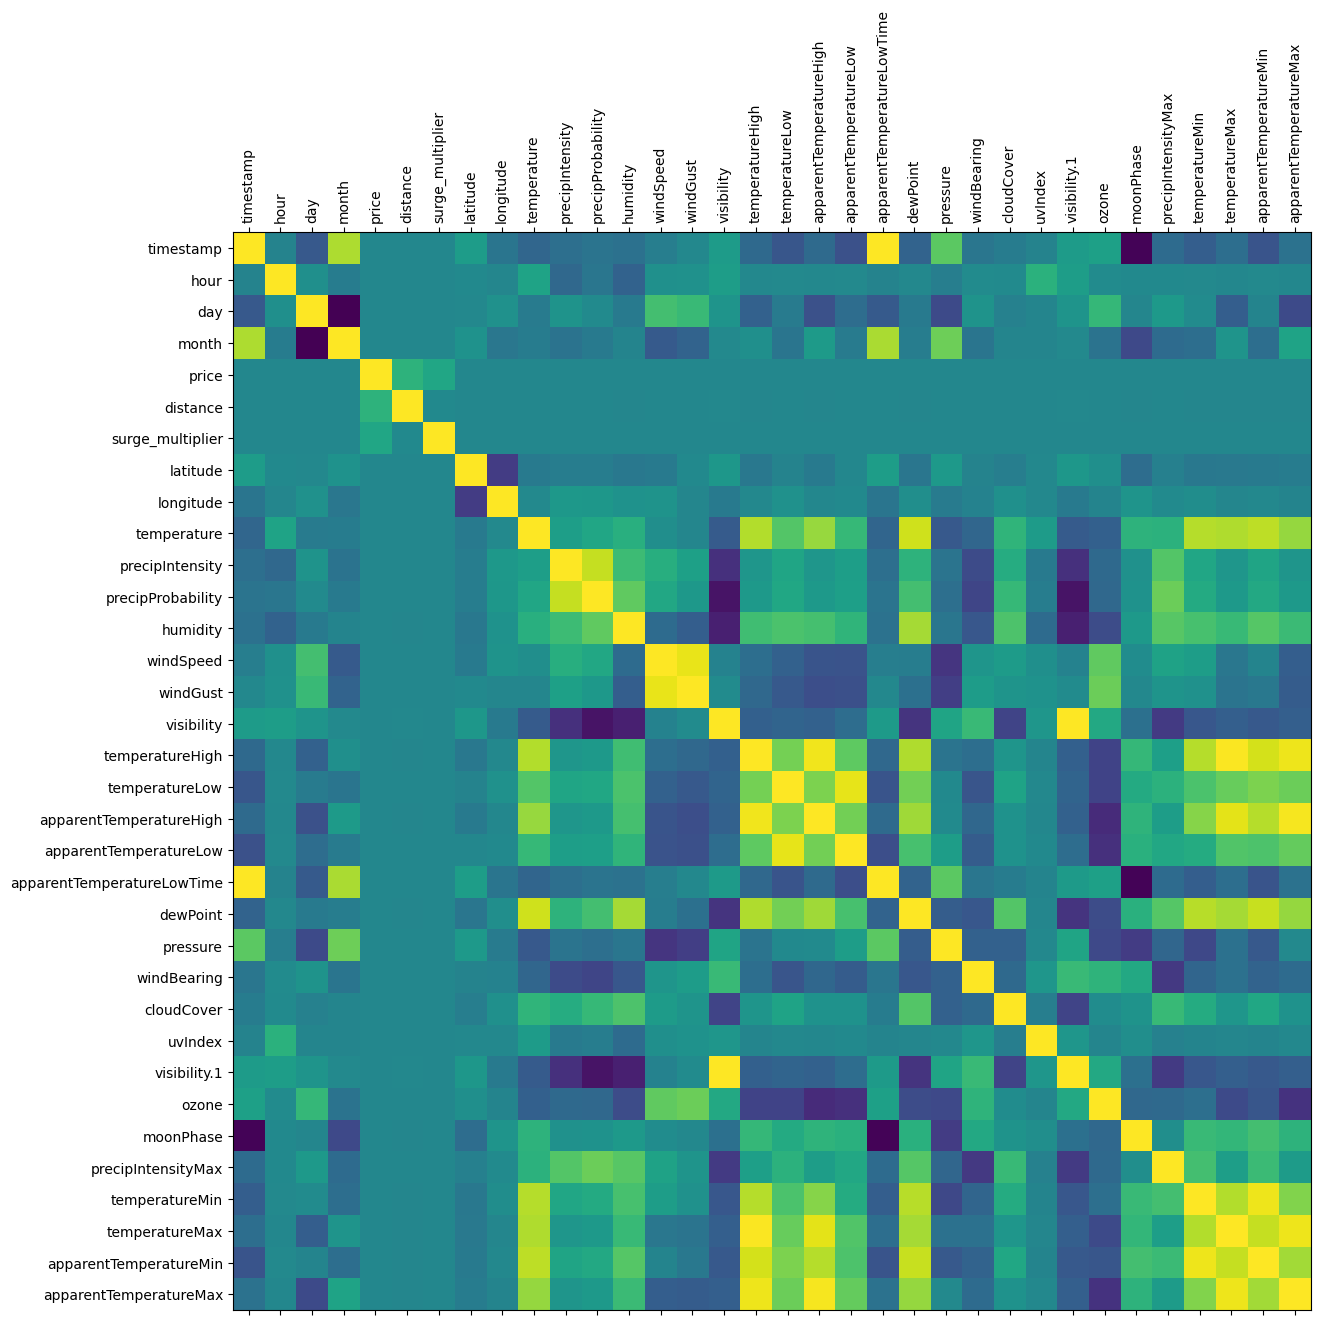

In [941]:
plot_corr(df)

In [942]:
df.sample()

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
460636,1.543416e+09,14,28,11,2018-11-28 14:38:07,Beacon Hill,Fenway,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,2.32,1.0,42.3661,-71.0631,39.02,Partly Cloudy,0.0,0.0,0.65,6.91,9.33,9.908,42.6,37.44,36.58,31.97,1543478400,28.08,991.71,290,0.37,1,9.908,350.4,0.72,0.0,33.75,42.6,29.97,36.58


In [943]:
# code to filter and remove columns, and plot the correlation matrix
cor_columns = df.filter(regex='temperature|apparent').columns.tolist()
cor_columns.remove('temperature')
print(cor_columns)

['temperatureHigh', 'temperatureLow', 'apparentTemperatureHigh', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'temperatureMin', 'temperatureMax', 'apparentTemperatureMin', 'apparentTemperatureMax']


In [944]:
df = df.drop(columns=cor_columns)

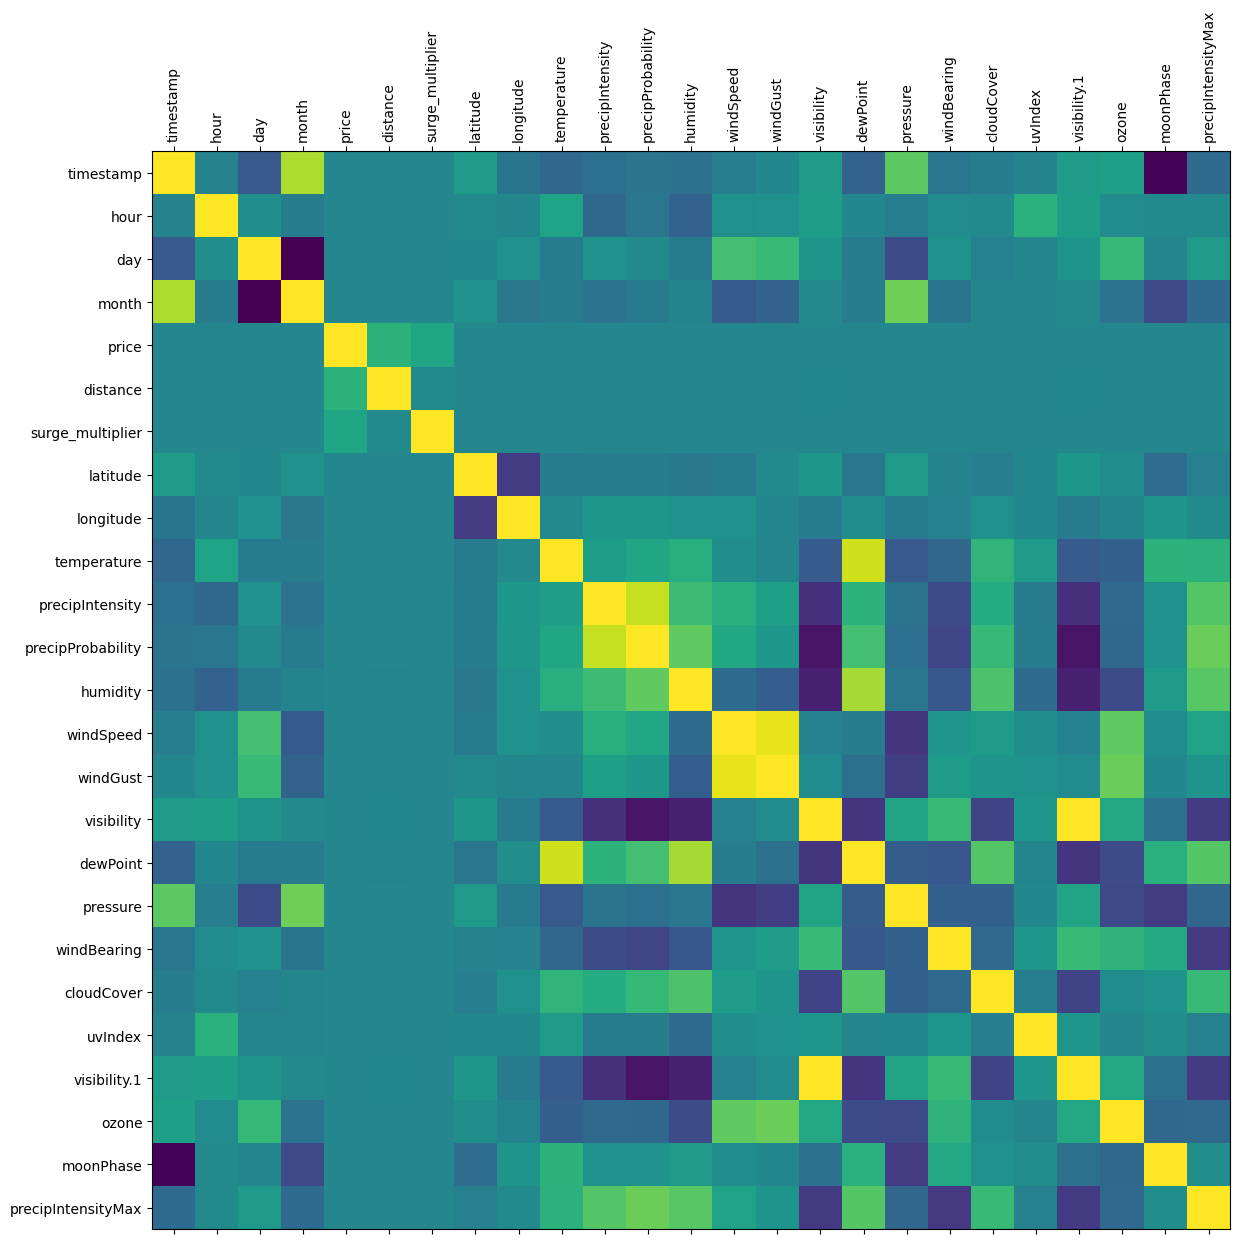

In [945]:
plot_corr(df)

In [946]:
df.sample(5)

,timestamp,hour,day,month,datetime,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,moonPhase,precipIntensityMax
497284,1.543728e+09,5,2,12,2018-12-02 05:23:03,Boston University,Beacon Hill,Lyft,lyft_line,Shared,7.0,2.67,1.0,42.3503,-71.0810,38.19,Overcast,0.0,0.0,0.83,2.07,3.50,9.698,33.58,1021.39,136,1.00,0,9.698,269.8,0.86,0.0916
401820,1.544785e+09,10,14,12,2018-12-14 10:55:08,Beacon Hill,Fenway,Lyft,lyft_line,Shared,5.0,2.30,1.0,42.3519,-71.0643,27.71,Partly Cloudy,0.0,0.0,0.79,2.96,4.75,9.641,22.07,1033.84,148,0.14,0,9.641,294.7,0.24,0.0000
8130,1.544801e+09,15,14,12,2018-12-14 15:20:09,Back Bay,Fenway,Lyft,lyft,Lyft,7.0,1.43,1.0,42.3588,-71.0707,40.90,Clear,0.0,0.0,0.64,3.31,4.16,9.876,29.83,1033.33,207,0.00,1,9.876,290.3,0.24,0.0000
287804,1.544816e+09,19,14,12,2018-12-14 19:30:11,North End,Beacon Hill,Lyft,lyft,Lyft,9.0,1.75,1.0,42.3661,-71.0631,45.82,Partly Cloudy,0.0,0.0,0.53,4.16,4.16,9.874,29.78,1029.37,165,0.39,0,9.874,289.0,0.24,0.0000
8913,1.545090e+09,23,17,12,2018-12-17 23:45:03,Fenway,North Station,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,16.0,3.07,1.0,42.3559,-71.0550,38.96,Overcast,0.0,0.0,0.70,7.11,11.22,9.955,29.98,1000.88,294,0.92,0,9.955,376.8,0.33,0.0177


In [947]:
# Mengecek kesinambungan antara product_id dan name
check_continuity = df.groupby(['product_id', 'name']).size().reset_index(name='count')

# Menampilkan baris yang memiliki lebih dari satu kemunculan
inconsistent_rows = check_continuity[check_continuity['count'] > 1]

# Menampilkan hasil
print(inconsistent_rows)

                              product_id          name  count
0   55c66225-fbe7-4fd5-9072-eab1ece5e23e         UberX  55094
1   6c84fd89-3f11-4782-9b50-97c468b19529         Black  55095
2   6d318bcc-22a3-4af6-bddd-b409bfce1546     Black SUV  55096
3   6f72dfc5-27f1-42e8-84db-ccc7a75f6969        UberXL  55096
4   8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a          Taxi  55095
5   997acbb5-e102-41e1-b155-9df7de0a73f2      UberPool  55091
6   9a0e7b09-b92b-4c41-9779-2ad22b4d779d           WAV  55096
7                                   lyft          Lyft  51235
8                              lyft_line        Shared  51233
9                               lyft_lux     Lux Black  51235
10                           lyft_luxsuv  Lux Black XL  51235
11                             lyft_plus       Lyft XL  51235
12                          lyft_premier           Lux  51235


In [948]:
# Mengecek kesinambungan antara product_id dan name
check_continuity = df.groupby(['surge_multiplier', 'cab_type']).size().reset_index(name='count')

# Menampilkan baris yang memiliki lebih dari satu kemunculan
inconsistent_rows = check_continuity[check_continuity['count'] > 1]

# Menampilkan hasil
print(inconsistent_rows)

   surge_multiplier cab_type   count
0              1.00     Lyft  286433
1              1.00     Uber  385663
2              1.25     Lyft   11085
3              1.50     Lyft    5065
4              1.75     Lyft    2420
5              2.00     Lyft    2239
6              2.50     Lyft     154
7              3.00     Lyft      12


In [949]:
# code to remove columns and plot the correlation matrix
df = df.drop(columns=['datetime','visibility.1', 'timestamp', 'latitude', 'longitude', 'precipProbability','windGust', 'product_id'])

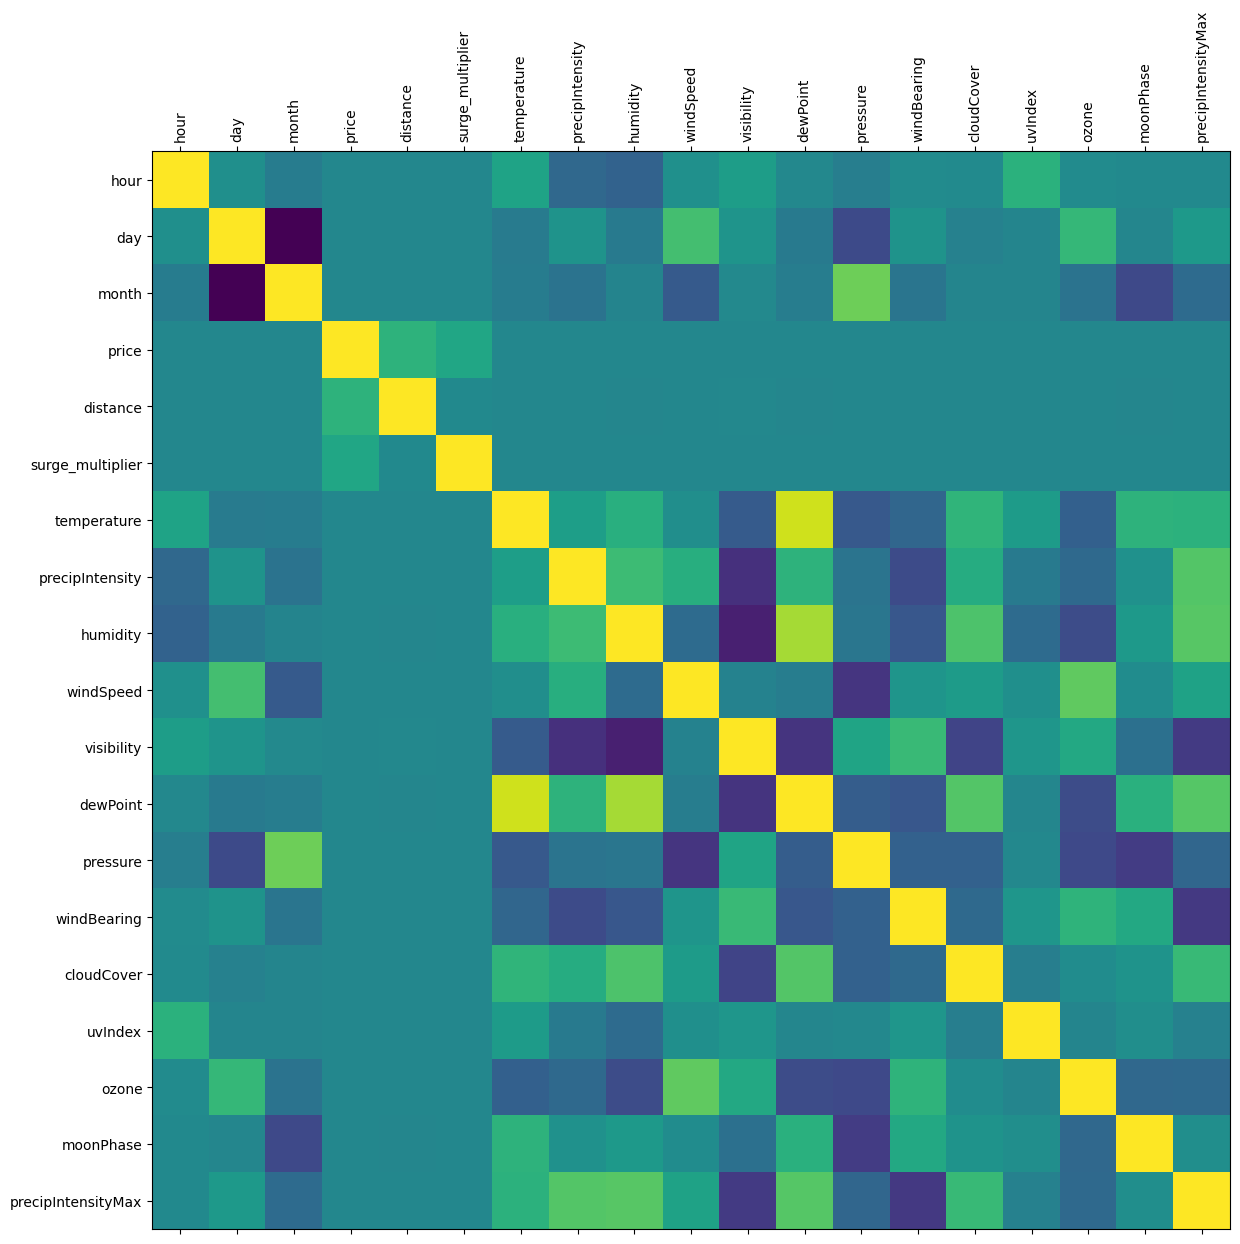

In [950]:
plot_corr(df)

In [951]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,0.0000,0.68,8.66,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,0.1299,0.94,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,0.0000,0.75,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,0.0000,0.73,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,0.0000,0.70,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


In [952]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                693071 non-null  int64  
 1   day                 693071 non-null  int64  
 2   month               693071 non-null  int64  
 3   source              693071 non-null  object 
 4   destination         693071 non-null  object 
 5   cab_type            693071 non-null  object 
 6   name                693071 non-null  object 
 7   price               637976 non-null  float64
 8   distance            693071 non-null  float64
 9   surge_multiplier    693071 non-null  float64
 10  temperature         693071 non-null  float64
 11  short_summary       693071 non-null  object 
 12  precipIntensity     693071 non-null  float64
 13  humidity            693071 non-null  float64
 14  windSpeed           693071 non-null  float64
 15  visibility          693071 non-nul

In [953]:
print(df['source'].value_counts())

Financial District         58857
Theatre District           57813
Back Bay                   57792
Boston University          57764
North End                  57763
Fenway                     57757
Northeastern University    57756
South Station              57750
Haymarket Square           57736
West End                   57562
Beacon Hill                57403
North Station              57118
Name: source, dtype: int64


In [954]:
print(df['month'].value_counts())

12    406614
11    286457
Name: month, dtype: int64


In [955]:
print(df['day'].value_counts())

27    76121
28    73691
29    59974
1     45240
30    45084
16    44928
15    44928
14    44928
3     44928
2     44928
17    44928
13    38531
18    36192
26    31587
4     12636
10     2773
9      1674
Name: day, dtype: int64


In [956]:
print(df['destination'].value_counts())

Financial District         58851
Theatre District           57798
Back Bay                   57780
Haymarket Square           57764
Boston University          57764
Fenway                     57757
North End                  57756
Northeastern University    57755
South Station              57749
West End                   57575
Beacon Hill                57403
North Station              57119
Name: destination, dtype: int64


In [957]:
print(df['cab_type'].value_counts())

Uber    385663
Lyft    307408
Name: cab_type, dtype: int64


In [958]:
print(df['name'].value_counts())

UberXL          55096
WAV             55096
Black SUV       55096
Black           55095
Taxi            55095
UberX           55094
UberPool        55091
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: name, dtype: int64


In [959]:
print(df['surge_multiplier'].value_counts())

1.00    672096
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64


In [960]:
df.isnull().sum()

hour                      0
day                       0
month                     0
source                    0
destination               0
cab_type                  0
name                      0
price                 55095
distance                  0
surge_multiplier          0
temperature               0
short_summary             0
precipIntensity           0
humidity                  0
windSpeed                 0
visibility                0
dewPoint                  0
pressure                  0
windBearing               0
cloudCover                0
uvIndex                   0
ozone                     0
moonPhase                 0
precipIntensityMax        0
dtype: int64

In [961]:
len(df[df['price'].isnull()])

55095

In [962]:
# the code to handle missing data
df = df.dropna()

In [963]:
df.isnull().sum()

hour                  0
day                   0
month                 0
source                0
destination           0
cab_type              0
name                  0
price                 0
distance              0
surge_multiplier      0
temperature           0
short_summary         0
precipIntensity       0
humidity              0
windSpeed             0
visibility            0
dewPoint              0
pressure              0
windBearing           0
cloudCover            0
uvIndex               0
ozone                 0
moonPhase             0
precipIntensityMax    0
dtype: int64

In [964]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                637976 non-null  int64  
 1   day                 637976 non-null  int64  
 2   month               637976 non-null  int64  
 3   source              637976 non-null  object 
 4   destination         637976 non-null  object 
 5   cab_type            637976 non-null  object 
 6   name                637976 non-null  object 
 7   price               637976 non-null  float64
 8   distance            637976 non-null  float64
 9   surge_multiplier    637976 non-null  float64
 10  temperature         637976 non-null  float64
 11  short_summary       637976 non-null  object 
 12  precipIntensity     637976 non-null  float64
 13  humidity            637976 non-null  float64
 14  windSpeed           637976 non-null  float64
 15  visibility          637976 non-nul

**KESIMPULAN:** Setelah melakukan data cleaning dataset yang dimiliki menghapus kolom yang saling berkolerasi dan kolom yang tidak berpengaruh pada pembuatan model machine learning. Dataset yang sudah dicleaning memiliki `23` kolom, `637976` baris yang berukuran `121.7 MB`

# 5. EXPLORASI DATA

The code performs outlier removal and correlation analysis on the dataset. Outliers are data points that significantly deviate from the central tendency of the data and can negatively impact the results of statistical analysis and machine learning models. Correlation analysis is used to measure the strength and direction of linear relationships between variables.

**Code Explanation**:

1. **Calculate IQR (Interquartile Range)**:
   - The code calculates the Interquartile Range (IQR) for the 'price' column using the `describe()` method. The IQR is a measure of statistical dispersion and is used to identify potential outliers.
   - The code determines the first quartile (Q1) and third quartile (Q3) values using the "25%" and "75%" percentiles of the 'price' column, respectively.
   - The IQR is computed as the difference between Q3 and Q1.

2. **Define Outlier Limits**:
   - Using the IQR, the code defines lower and upper limits for identifying potential outliers. These limits are set at 1.5 times the IQR away from the quartiles:
     - `price_lower_limit = Q1 - (1.5 * IQR)`
     - `price_upper_limit = Q3 + (1.5 * IQR)`

3. **Filter Data for Outliers**:
   - The dataset is filtered to retain only those rows where the 'price' values fall within the calculated lower and upper limits. This process identifies and removes potential outliers from the dataset.
   - The resulting dataset without outliers is stored in the variable `df_without_outliers`.

4. **Correlation Analysis**:
   - The code calculates the correlation between variables in the `df_without_outliers` dataset using the `associations` function from the 'dython' library. This step provides insights into the relationships between different columns.


In [965]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,0.0000,0.68,8.66,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,0.1299,0.94,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,0.0000,0.75,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,0.0000,0.73,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,0.0000,0.70,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


In [966]:
# Calculate the first quartile (Q1) of the 'price' column
price_q1 = df["price"].describe().loc["25%"]

# Calculate the third quartile (Q3) of the 'price' column
price_q3 = df["price"].describe().loc["75%"]

# Calculate the interquartile range (IQR) of the 'price' column
price_iqr = price_q3 - price_q1

# Calculate the lower limit and the upper limit for identifying outliers
price_lower_limit = price_q1 - (1.5 * price_iqr)
price_upper_limit = price_q3 + (1.5 * price_iqr)

# Create a copy of the DataFrame 'df' containing data without outliers
df_without_outliers = df[(df["price"] >= price_lower_limit) & (df["price"] <= price_upper_limit)].copy()

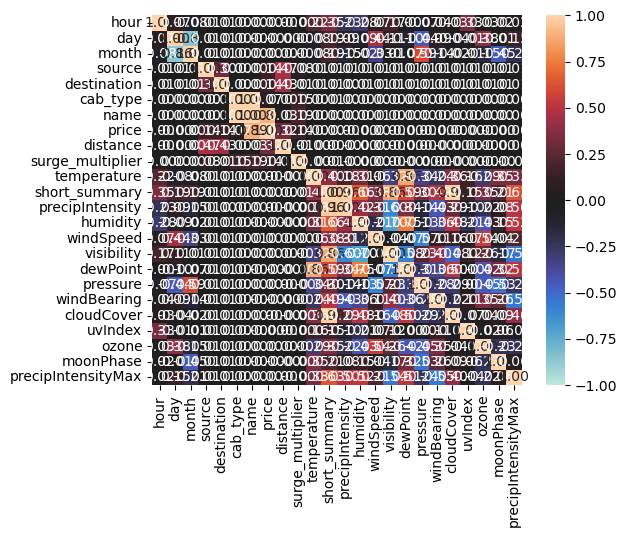

In [967]:
# Calculate the associations between variables in the DataFrame without outliers
corr_assc = associations(df_without_outliers)

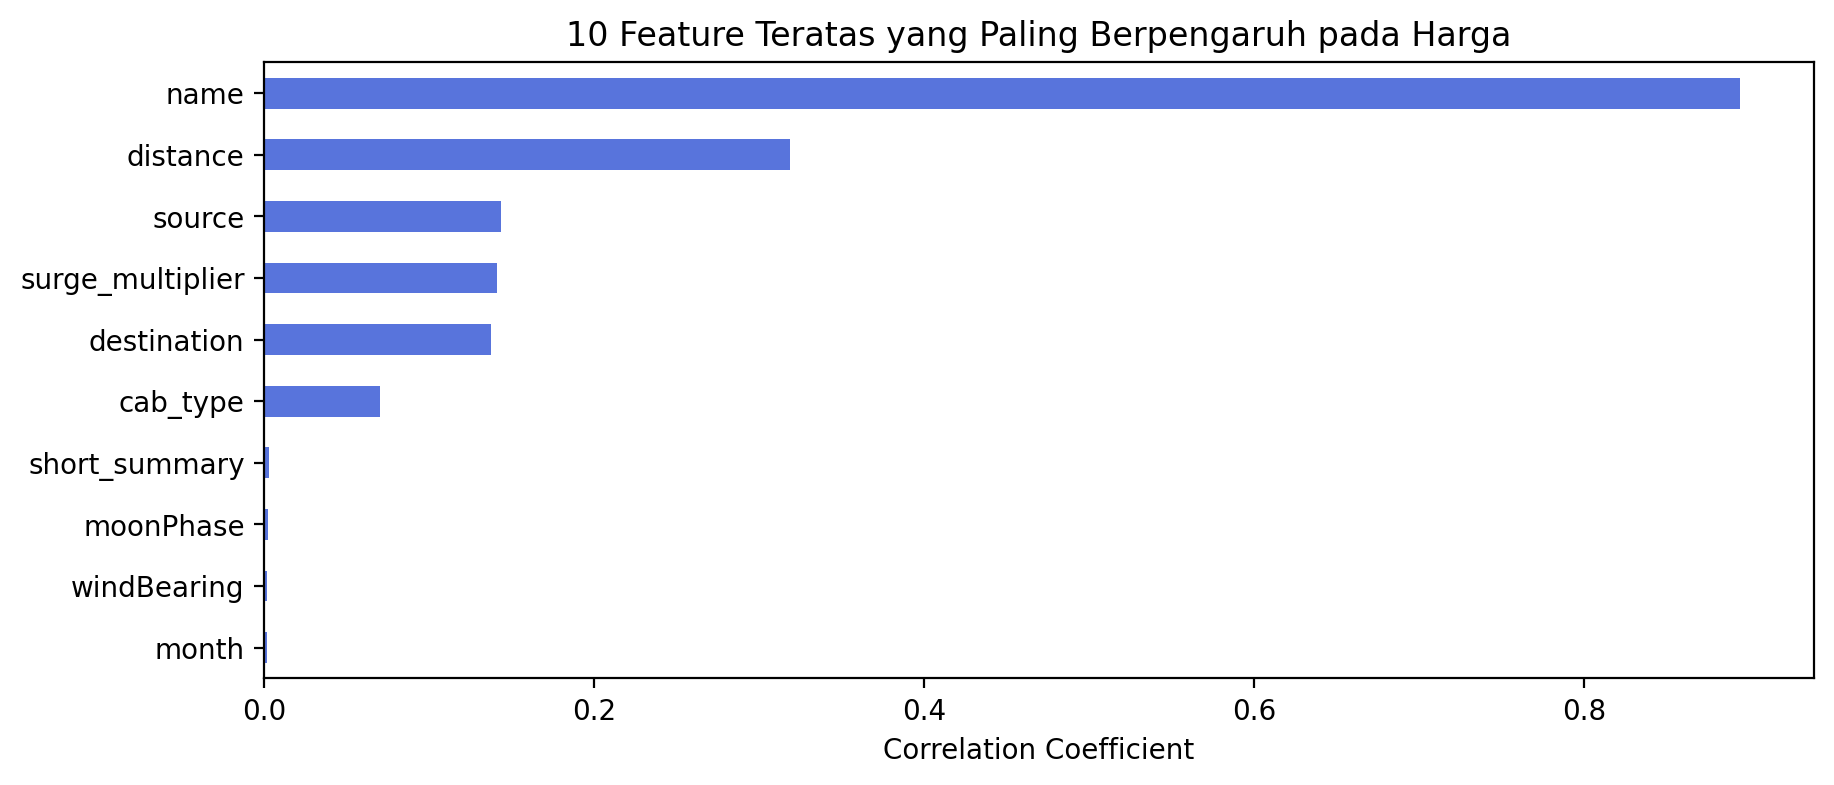

In [968]:
# Calculate the absolute correlation coefficients between the 'price' column and other features,
# excluding the 'price' correlation with itself
top_10_corr = abs(corr_assc["corr"][["price"]].drop("price")).sort_values("price",ascending=False).head(10)

# Create a bar plot of the top 10 features with the highest absolute correlation with 'price'
fig = plt.figure(figsize=(10,4),dpi=200)
top_10_corr.sort_values("price").plot(
    kind="barh",
    legend=None,
    color="#5874DC",
    ax=plt.gca()
)
plt.title("10 Feature Teratas yang Paling Berpengaruh pada Harga")
plt.xlabel("Correlation Coefficient")
plt.show()

In [969]:
# Select the columns of the DataFrame 'df_without_outliers' based on the top 10 correlated features and the 'price' column
df_without_outliers = df_without_outliers[list(top_10_corr.index) + ["price"]]
df_without_outliers.head()

,name,distance,source,surge_multiplier,destination,cab_type,short_summary,moonPhase,windBearing,month,price
0,Shared,0.44,Haymarket Square,1.0,North Station,Lyft,Mostly Cloudy,0.30,57,12,5.0
1,Lux,0.44,Haymarket Square,1.0,North Station,Lyft,Rain,0.64,90,11,11.0
2,Lyft,0.44,Haymarket Square,1.0,North Station,Lyft,Clear,0.68,240,11,7.0
3,Lux Black XL,0.44,Haymarket Square,1.0,North Station,Lyft,Clear,0.75,310,11,26.0
4,Lyft XL,0.44,Haymarket Square,1.0,North Station,Lyft,Partly Cloudy,0.72,303,11,9.0


In [970]:
# Calculate the mean prices for 'UberX' and 'Lyft' rides grouped by 'distance'
df_lyft_price_mean = df_without_outliers[
    (df_without_outliers["name"].isin(["UberX","Lyft"]))].groupby(["name","distance"]).mean()[["price"]
].reset_index()

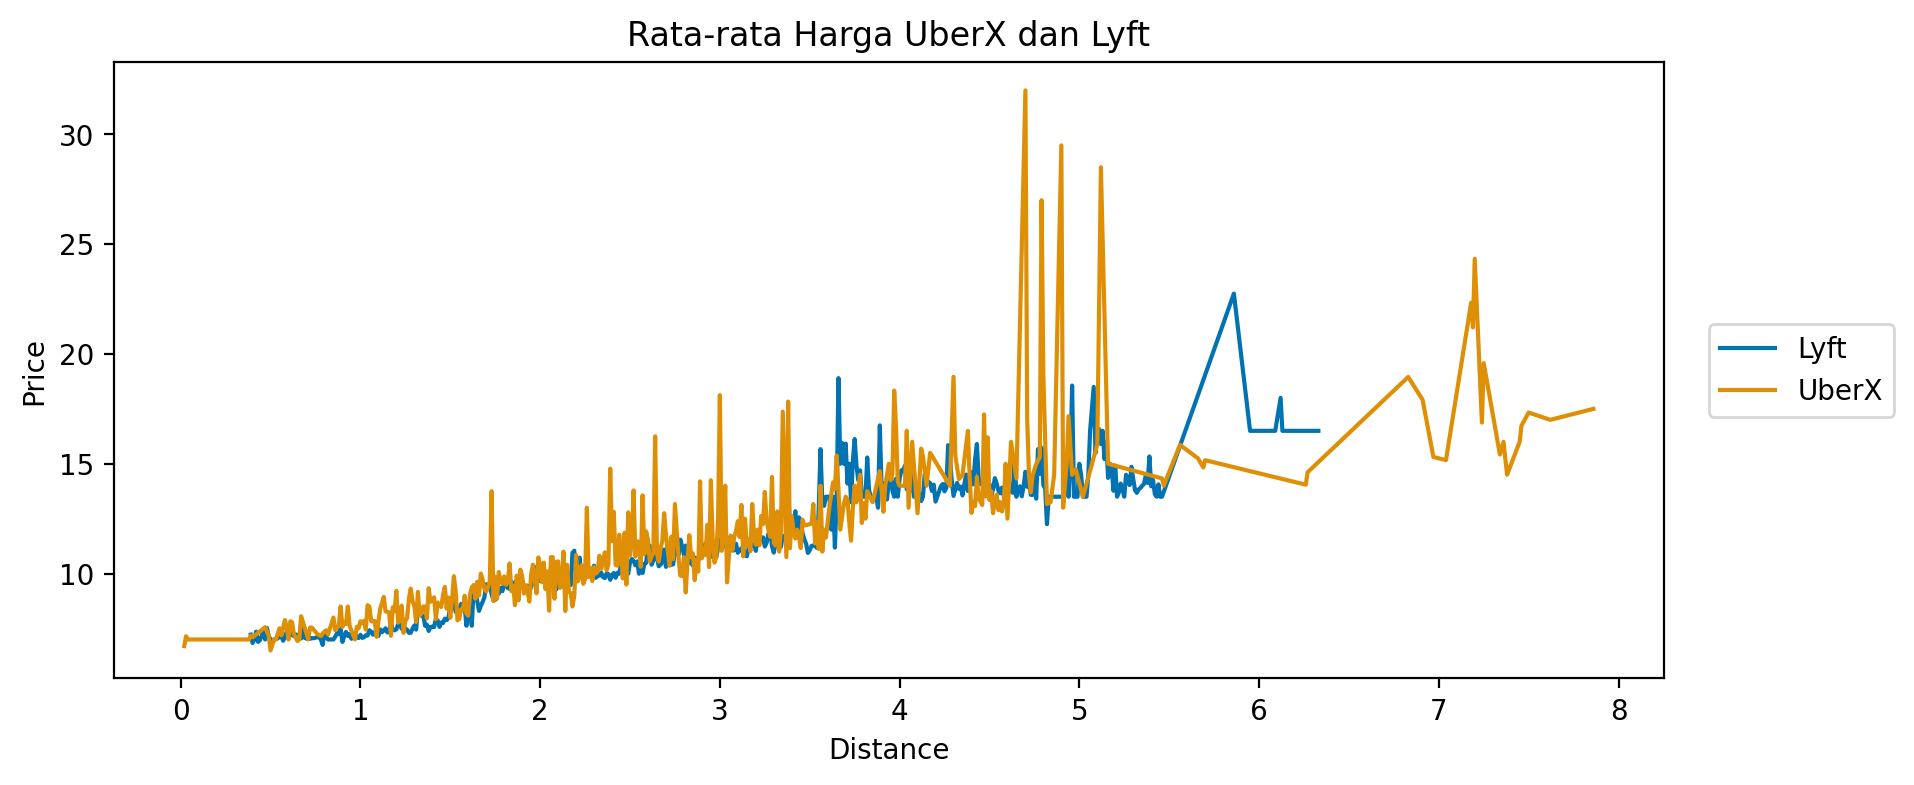

In [971]:
# Filter the DataFrame to include only distances that are common between 'Lyft' and 'UberX' rides
df_lyft_price_mean_lyft_price_mean = df_lyft_price_mean[
    df_lyft_price_mean["distance"].isin(
        set(
            list(df_lyft_price_mean[df_lyft_price_mean["name"] == "Lyft"]["distance"].unique())
        ).intersection(
            list(df_lyft_price_mean[df_lyft_price_mean["name"] == "UberX"]["distance"].unique())
        )
    )
]

# Create a line plot to visualize the average prices for 'UberX' and 'Lyft' rides based on distance
plt.figure(figsize=(10,4),dpi=200)
sns.lineplot(data=df_lyft_price_mean,x="distance",y="price",hue="name")
plt.title("Rata-rata Harga UberX dan Lyft")
plt.xlabel("Distance")
plt.ylabel("Price")
plt.legend(bbox_to_anchor=(1.02,0.5),loc="center left")
plt.show()

In [972]:
# Filter and group the DataFrame for 'Uber' and 'Lyft' rides separately and sum the prices for each ride category
uber = df_without_outliers[df_without_outliers["cab_type"] == "Uber"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)
lyft = df_without_outliers[df_without_outliers["cab_type"] == "Lyft"].groupby("name").sum()[["price"]].sort_values("price",ascending=False)

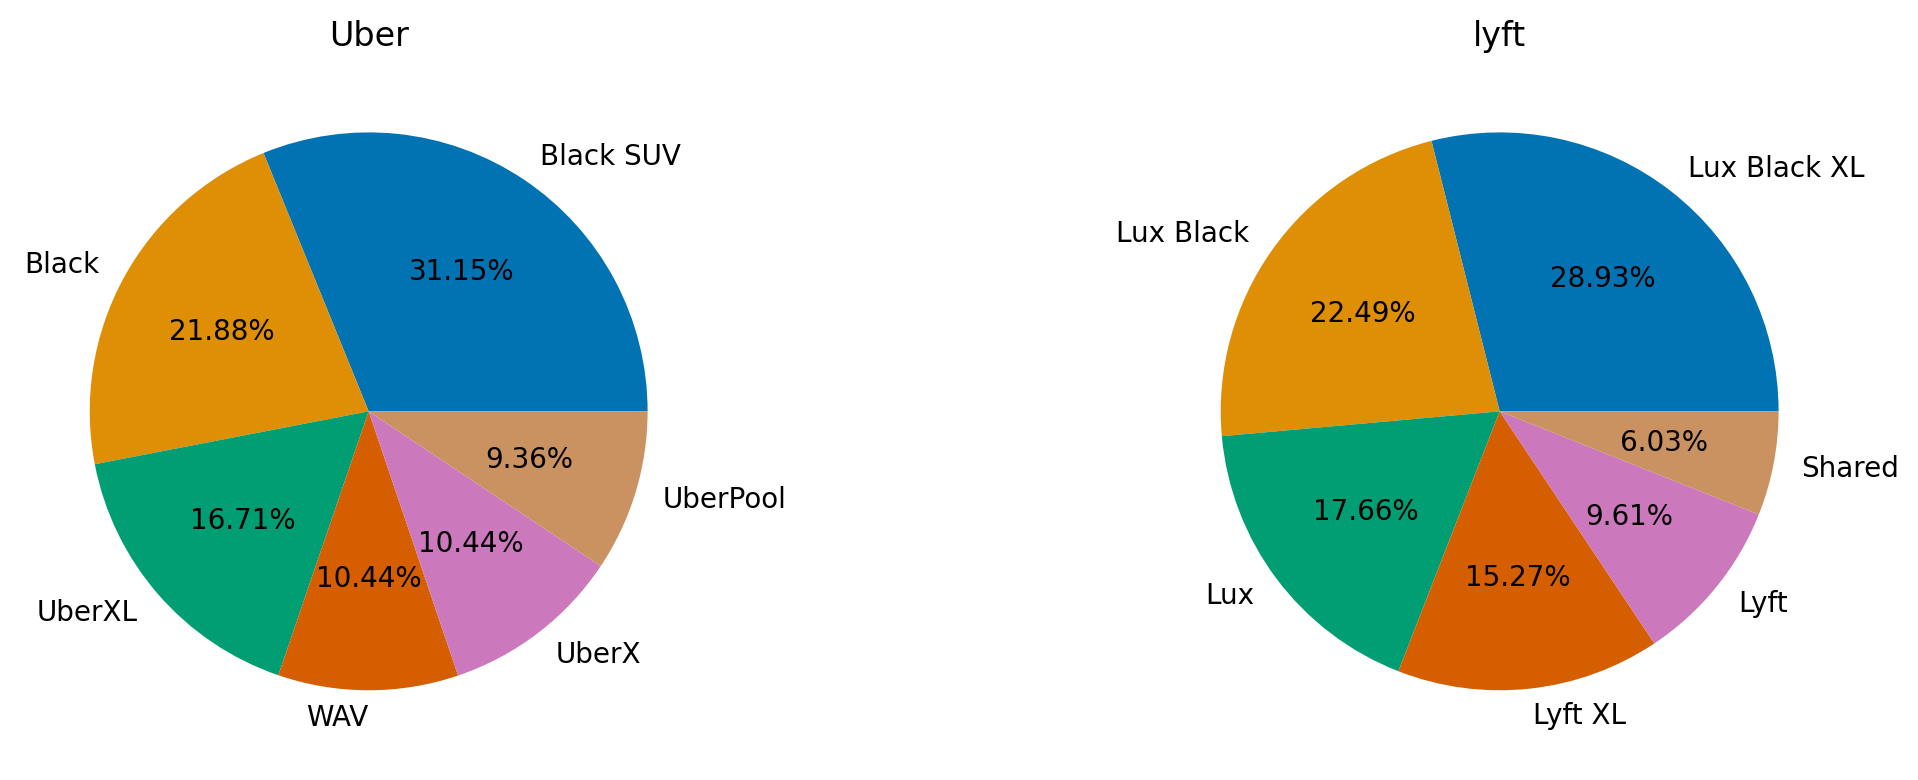

In [973]:
# Create a subplot with two pie charts, one for 'Uber' and one for 'Lyft'
fig,ax = plt.subplots(figsize=(12,4),dpi=200,nrows=1,ncols=2)

# Plot the pie chart for 'Uber'
ax[0].pie (uber["price"],labels=uber.index,autopct="%.2f%%",colors=sns.set_palette("colorblind"))
ax[0].set_title("Uber")

# Plot the pie chart for 'Lyft'
ax[1].pie (lyft["price"], labels=lyft.index,autopct="%.2f%%",colors=sns.set_palette("colorblind"))
ax[1].set_title("lyft")

# Adjust the layout
plt.tight_layout()
plt.show()

**Function Name**: `diagnostic_plots`

**Description**:
The `diagnostic_plots` function is designed for exploratory data analysis (EDA). It creates diagnostic plots for a specified numerical variable within a DataFrame. The function generates two types of plots: a histogram and a boxplot. These plots help visualize the distribution and potential outliers of the data, allowing for a quick assessment of its characteristics.

**Parameters**:
- `df` (DataFrame): The input DataFrame containing the data to be analyzed.
- `variable` (str): The name of the numerical variable in the DataFrame for which diagnostic plots are to be generated.

**Functionality**:
1. The function defines the figure size to create a properly-sized plot.

2. It generates two subplots within the same figure:
   - **Histogram**: A histogram of the specified variable is created using `sns.histplot`. This plot displays the distribution of the data, showing the frequency of values within different bins.
   - **Boxplot**: A boxplot of the variable is generated using `sns.boxplot`. The boxplot provides insights into the central tendency, spread, and potential outliers in the data.

3. The plots are displayed using `plt.show()`.

4. After plotting, the code calculates and prints the skewness value for the variable. Skewness indicates the degree of asymmetry in the distribution of the data. A positive skewness value suggests a right-skewed distribution, while a negative value suggests a left-skewed distribution. A skewness value of 0 indicates a perfectly symmetrical distribution.


In [974]:
# Make a diagnostic_plots function
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

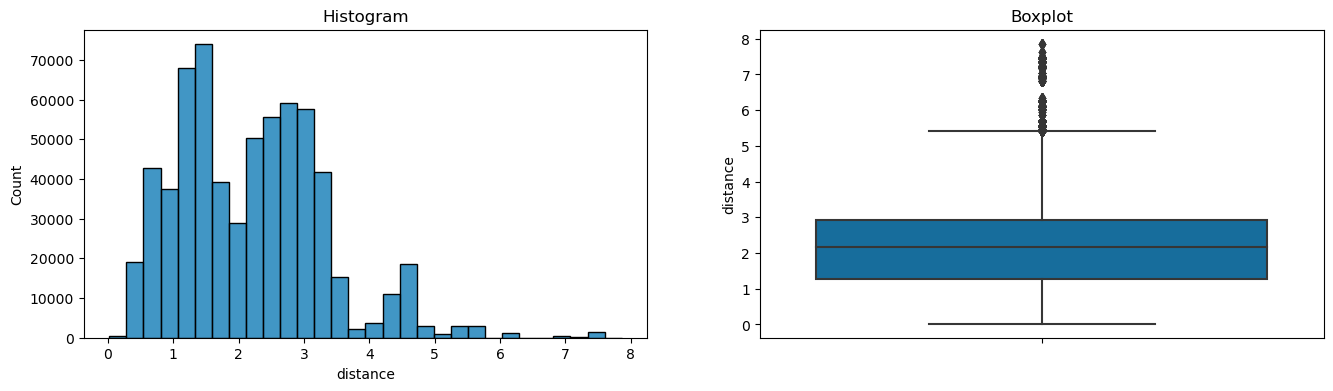


Skewness Value :  0.8168484903389348


In [975]:
# Call the function to generate diagnostic plots for 'distance'
diagnostic_plots(df, 'distance')
print('\nSkewness Value : ', df['distance'].skew())

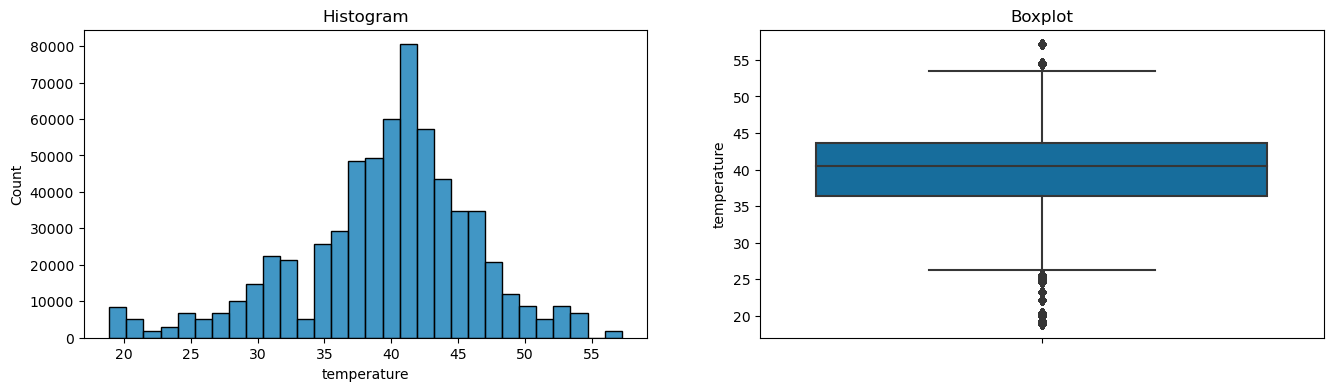


Skewness Value :  -0.6091907964028547


In [976]:
# Call the function to generate diagnostic plots for 'temperature'
diagnostic_plots(df, 'temperature')
print('\nSkewness Value : ', df['temperature'].skew())

In [977]:
print(df['precipIntensity'].value_counts())
len(df['precipIntensity'].value_counts())

0.0000    499228
0.0020      5196
0.0005      4980
0.1058      3743
0.0013      3414
           ...  
0.0701      1696
0.0010      1561
0.0053      1548
0.0006      1547
0.0074      1542
Name: precipIntensity, Length: 63, dtype: int64


63

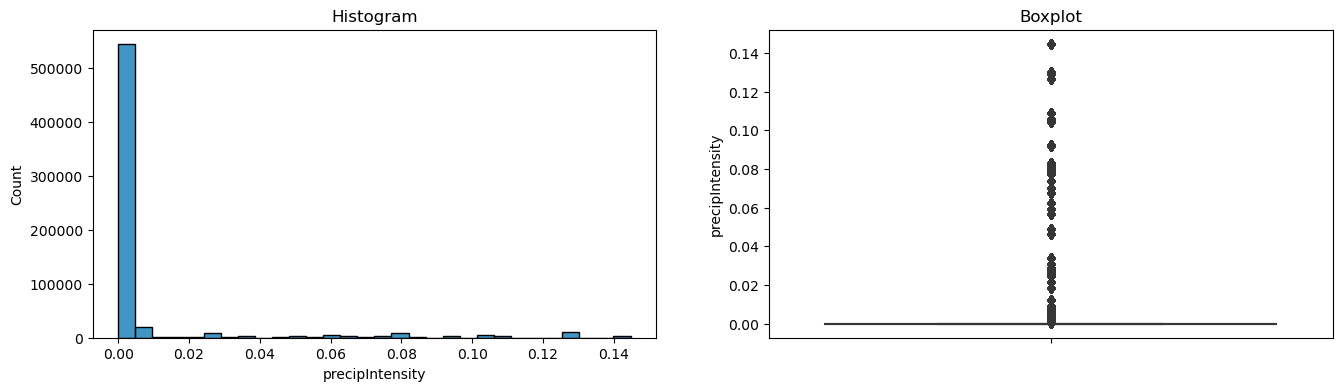


Skewness Value :  3.3280198751510444


In [978]:
# Call the function to generate diagnostic plots for 'precipIntensity'
diagnostic_plots(df, 'precipIntensity')
print('\nSkewness Value : ', df['precipIntensity'].skew())

In [979]:
print(df['surge_multiplier'].value_counts())

1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64


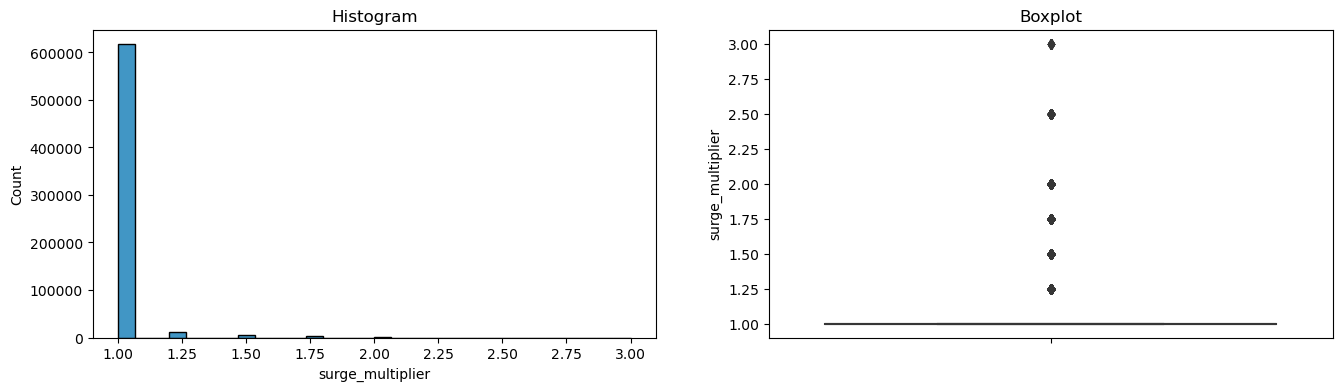


Skewness Value :  7.969048488132256


In [980]:
# Call the function to generate diagnostic plots for 'surge_multiplier'
diagnostic_plots(df, 'surge_multiplier')
print('\nSkewness Value : ', df['surge_multiplier'].skew())

In [981]:
print(df['humidity'].value_counts())

0.69    34092
0.91    33595
0.70    33556
0.92    27523
0.71    25864
0.64    24362
0.93    23799
0.94    20977
0.65    19951
0.60    17921
0.88    17703
0.73    17280
0.57    17091
0.89    15383
0.72    14833
0.63    12951
0.79    12231
0.95    12061
0.85    11993
0.90    11868
0.68    11498
0.61    11462
0.78    10946
0.58    10946
0.81    10483
0.66    10367
0.54    10347
0.62    10342
0.96    10339
0.67    10326
0.51    10306
0.83     9715
0.77     8619
0.50     8611
0.52     8605
0.74     8585
0.86     8264
0.75     7651
0.80     6913
0.84     6703
0.55     5639
0.56     5340
0.82     5192
0.87     5164
0.46     5149
0.59     5057
0.53     3459
0.44     2873
0.41     1745
0.40     1712
0.38      584
Name: humidity, dtype: int64


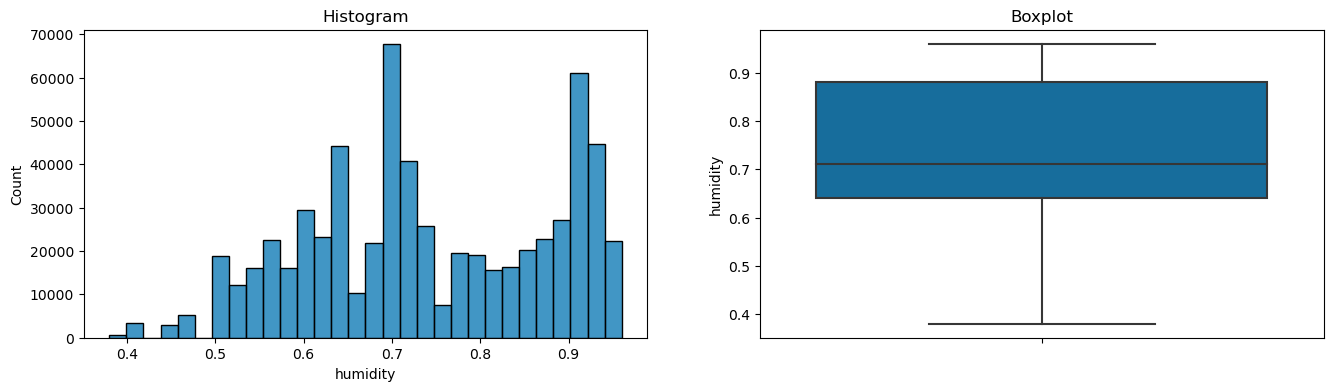


Skewness Value :  -0.07483972272283484


In [982]:
# Call the function to generate diagnostic plots for 'humidity'
diagnostic_plots(df, 'humidity')
print('\nSkewness Value : ', df['humidity'].skew())

In [983]:
print(df['windSpeed'].value_counts())

8.33    8317
8.11    6900
8.41    6756
4.54    6176
8.28    6028
        ... 
0.45     390
5.15     338
4.58     146
4.80     141
0.51      77
Name: windSpeed, Length: 291, dtype: int64


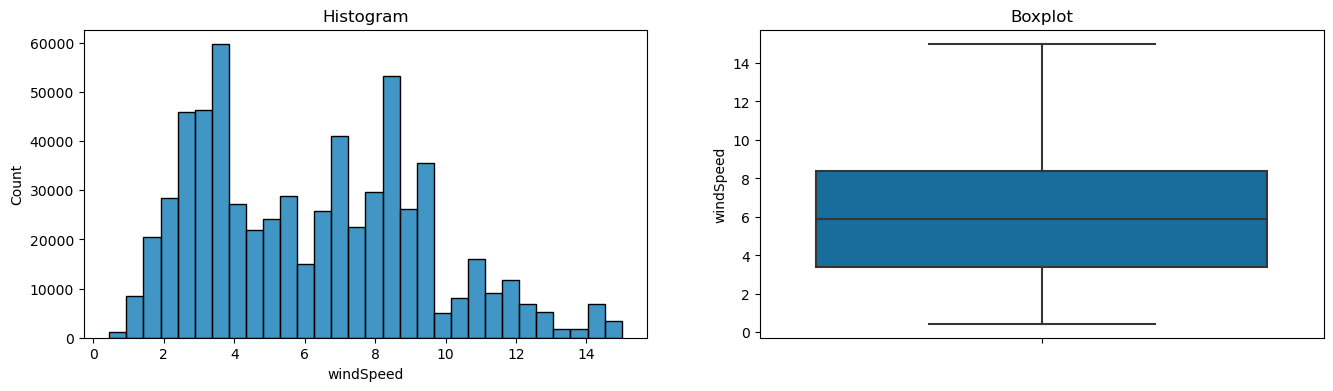


Skewness Value :  0.4512322984013802


In [984]:
# Call the function to generate diagnostic plots for 'windSpeed'
diagnostic_plots(df, 'windSpeed')
print('\nSkewness Value : ', df['windSpeed'].skew())

In [985]:
print(df['visibility'].value_counts())

10.000    153880
9.933       8052
9.972       7145
9.974       6351
9.961       6334
           ...  
4.675        616
9.883        584
4.159        390
5.138        233
1.685         77
Name: visibility, Length: 227, dtype: int64


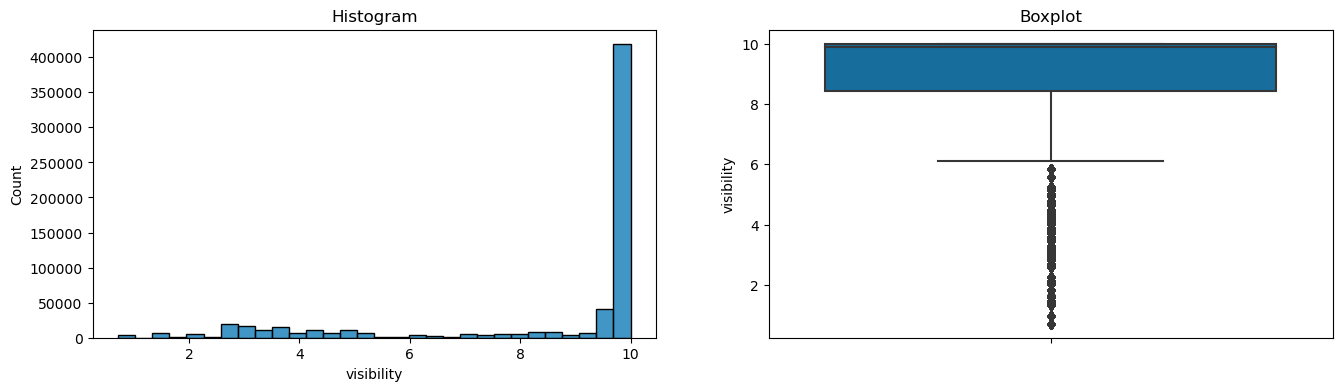


Skewness Value :  -1.5081095413841608


In [986]:
# Call the function to generate diagnostic plots for 'visibility'
diagnostic_plots(df, 'visibility')
print('\nSkewness Value : ', df['visibility'].skew())

In [987]:
print(df['dewPoint'].value_counts())

28.39    8049
30.16    6895
30.30    5032
28.36    5013
29.86    4881
         ... 
29.31     338
39.64     233
29.15     146
15.46     141
39.62      77
Name: dewPoint, Length: 313, dtype: int64


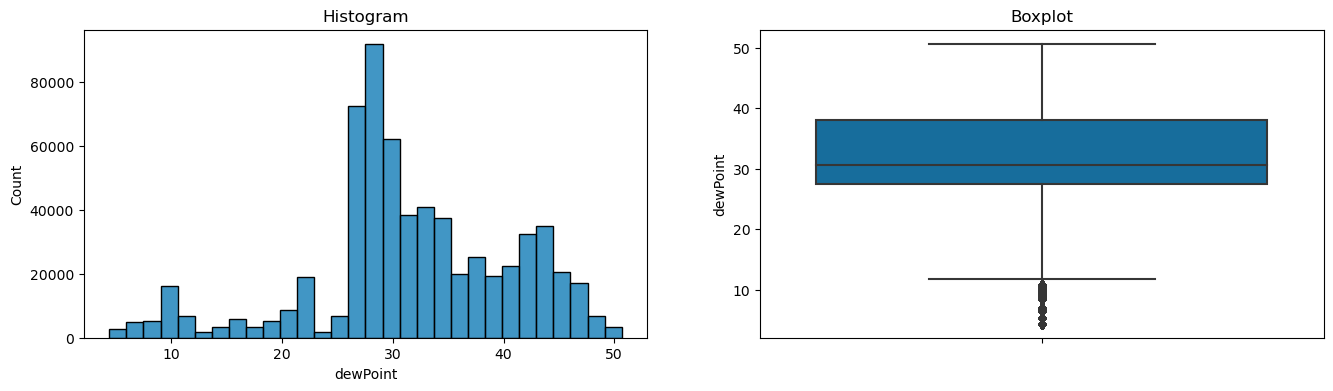


Skewness Value :  -0.49794893616920366


In [988]:
# Call the function to generate diagnostic plots for 'dewPoint'
diagnostic_plots(df, 'dewPoint')
print('\nSkewness Value : ', df['dewPoint'].skew())

In [989]:
print(df['pressure'].value_counts())

996.21     5182
996.92     5032
991.46     4926
995.30     4881
994.99     4611
           ... 
1014.06     390
1014.18     233
991.23      146
1021.33     141
1014.10      77
Name: pressure, Length: 316, dtype: int64


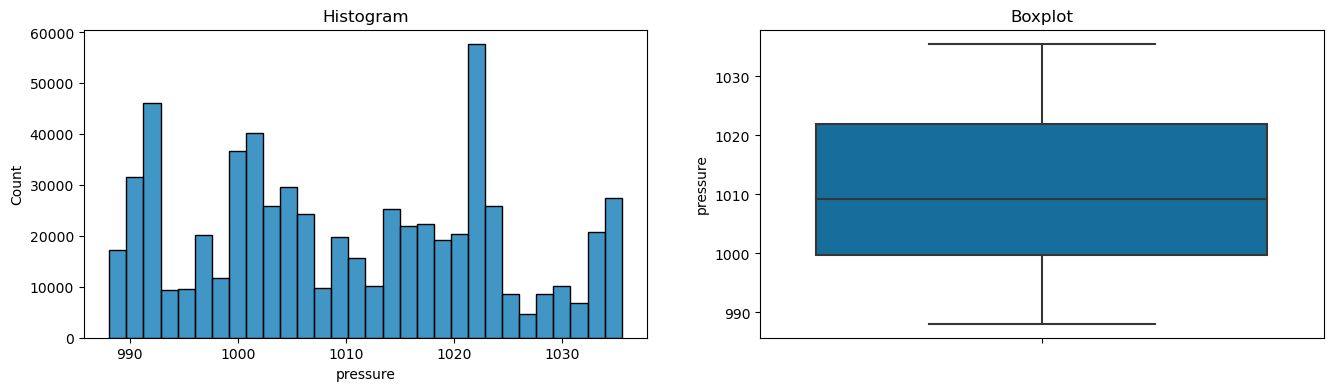


Skewness Value :  0.15434905819998262


In [990]:
# Call the function to generate diagnostic plots for 'pressure'
diagnostic_plots(df, 'pressure')
print('\nSkewness Value : ', df['pressure'].skew())

In [991]:
print(df['windBearing'].value_counts())

303    17187
295    14210
297    14194
313    11922
294    10354
       ...  
19      1538
110     1462
91       616
248      338
88       233
Name: windBearing, Length: 195, dtype: int64


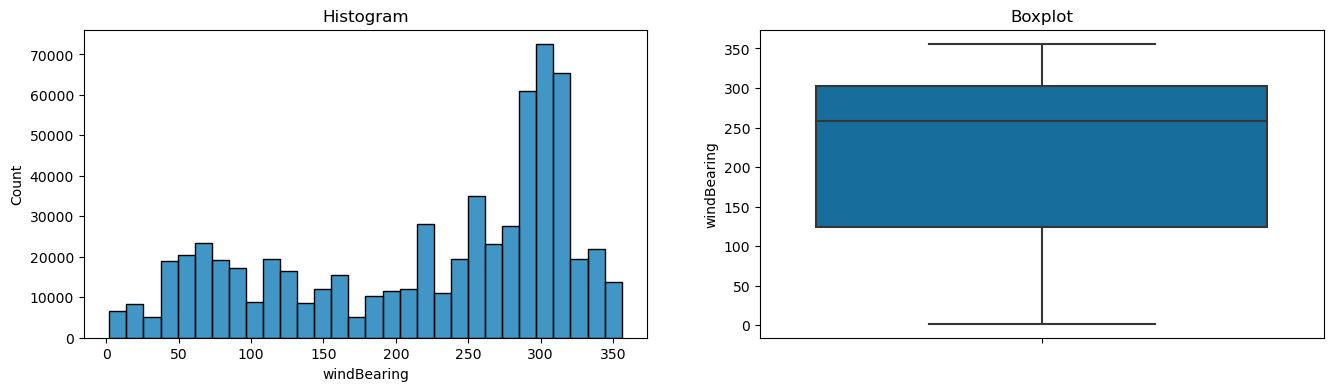


Skewness Value :  -0.6269987126950634


In [992]:
# Call the function to generate diagnostic plots for 'windBearing'
diagnostic_plots(df, 'windBearing')
print('\nSkewness Value : ', df['windBearing'].skew())

In [993]:
print(df['cloudCover'].value_counts())

1.00    246511
0.00     36451
0.81     17821
0.77     14797
0.99     13200
         ...  
0.66      1705
0.56      1704
0.09      1703
0.10      1702
0.40      1699
Name: cloudCover, Length: 83, dtype: int64


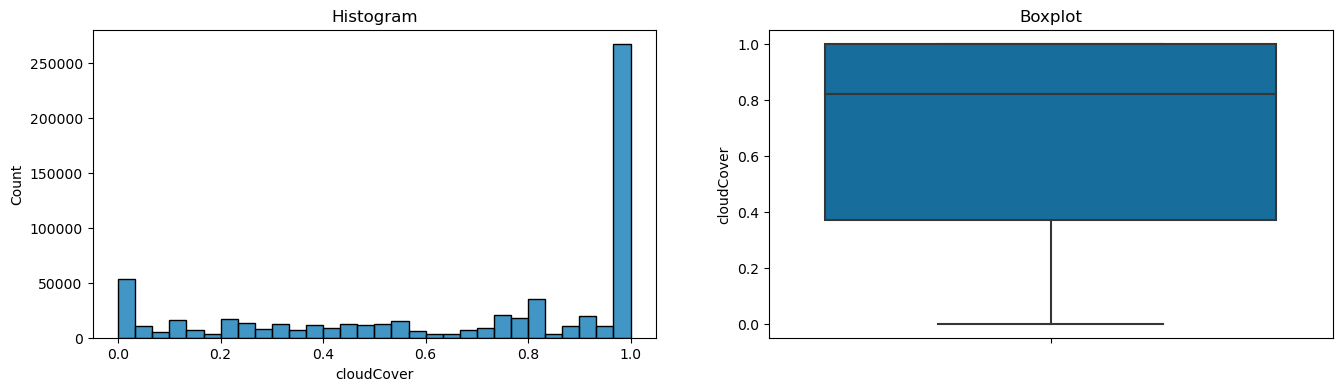


Skewness Value :  -0.7320033735951248


In [994]:
# Call the function to generate diagnostic plots for 'cloudCover'
diagnostic_plots(df, 'cloudCover')
print('\nSkewness Value : ', df['cloudCover'].skew())

In [995]:
print(df['uvIndex'].value_counts())

0    491206
1    134664
2     12106
Name: uvIndex, dtype: int64


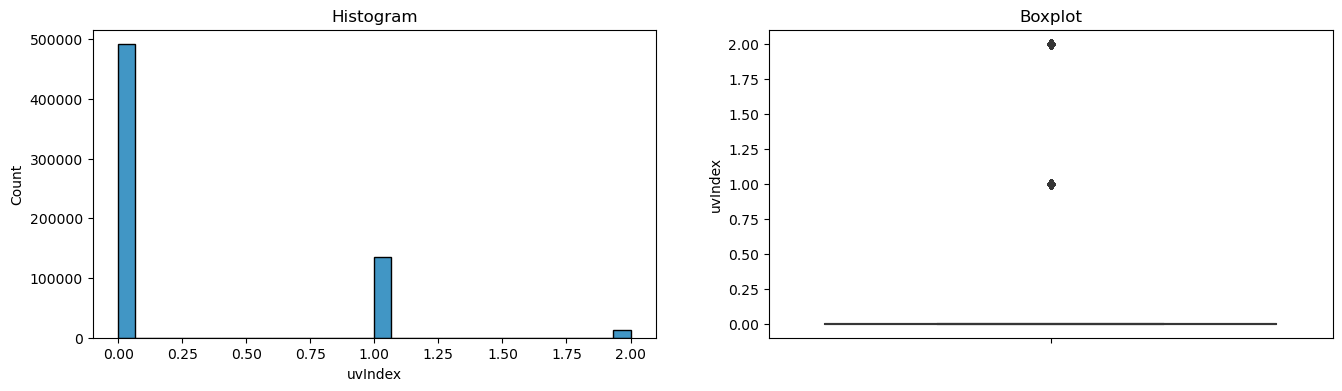


Skewness Value :  1.6810333156438335


In [996]:
# Call the function to generate diagnostic plots for 'uvIndex'
diagnostic_plots(df, 'uvIndex')
print('\nSkewness Value : ', df['uvIndex'].skew())

In [997]:
print(df['ozone'].value_counts())

290.3    8026
355.0    7883
291.1    6348
296.0    5215
299.7    5197
         ... 
346.0     563
313.0     390
338.1     338
301.9     233
306.6     141
Name: ozone, Length: 274, dtype: int64


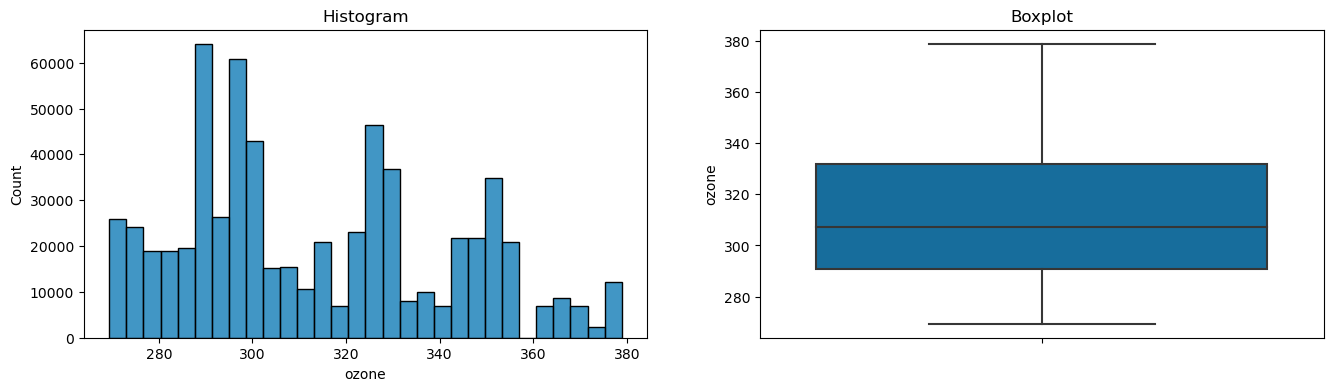


Skewness Value :  0.4148217500942472


In [998]:
# Call the function to generate diagnostic plots for 'ozone'
diagnostic_plots(df, 'ozone')
print('\nSkewness Value : ', df['ozone'].skew())

In [999]:
print(df['moonPhase'].value_counts())

0.72    87029
0.68    58242
0.64    44071
0.79    41811
0.82    41389
0.24    41378
0.33    41367
0.30    41321
0.27    41319
0.86    41298
0.21    41236
0.89    41201
0.75    41051
0.37    24717
0.09     4063
0.93     3140
0.18     2876
0.60      467
Name: moonPhase, dtype: int64


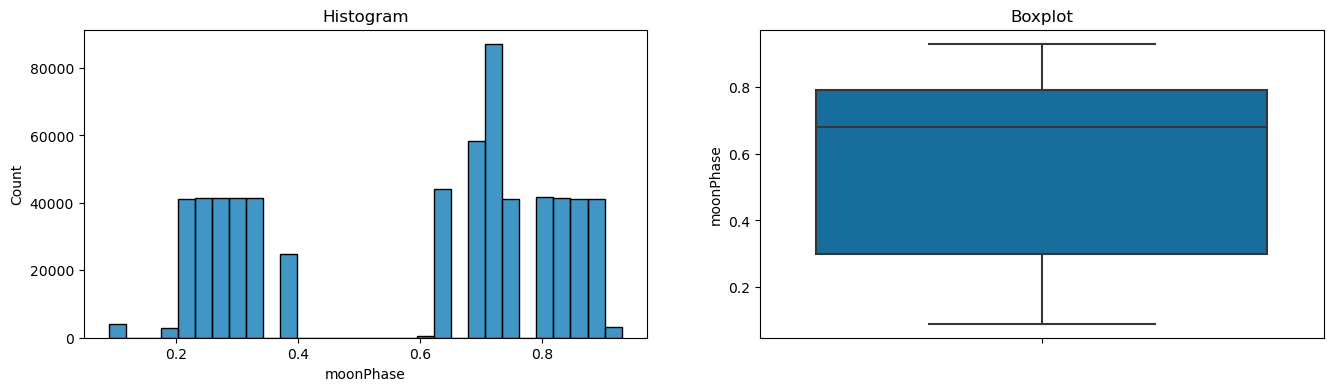


Skewness Value :  -0.37971542649863205


In [1000]:
# Call the function to generate diagnostic plots for 'moonPhase'
diagnostic_plots(df, 'moonPhase')
print('\nSkewness Value : ', df['moonPhase'].skew())

In [1001]:
print(df['precipIntensityMax'].value_counts())

0.0000    210026
0.0001     54979
0.0004     41613
0.0003     19571
0.1430     17207
           ...  
0.1361      1541
0.1215      1540
0.1217      1462
0.1459       390
0.1396        77
Name: precipIntensityMax, Length: 65, dtype: int64


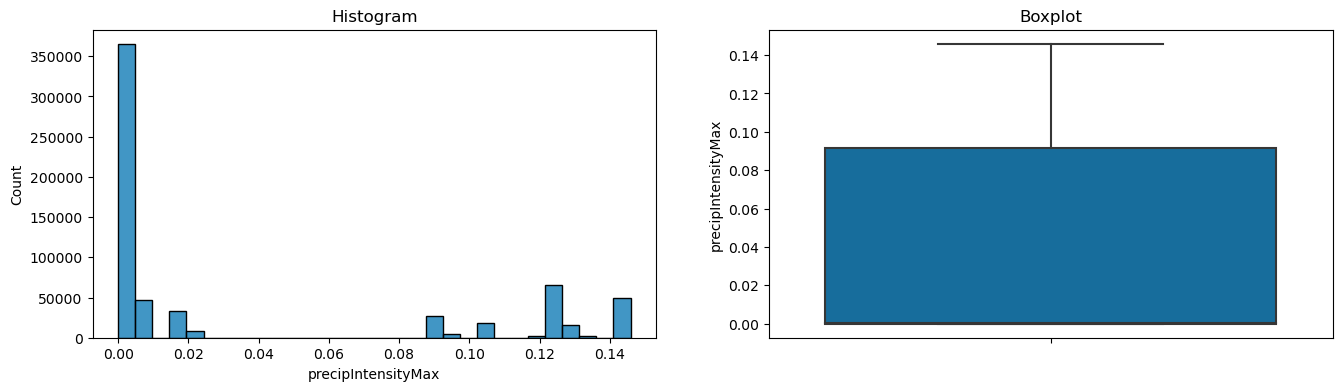


Skewness Value :  0.9927848729040046


In [1002]:
# Call the function to generate diagnostic plots for 'precipIntensityMax'
diagnostic_plots(df, 'precipIntensityMax')
print('\nSkewness Value : ', df['precipIntensityMax'].skew())

**NOTE:** Kolom yang memiliki outlier adalah precipIntensity, distance, temperature, precipIntensity, surge_multiplier,  visibility, dewPoint

# 6. DATA PREPROCESSING

## 6.1 Outlier Handling

The code focuses on handling outliers within a DataFrame using the Winsorizing method. Winsorizing involves capping extreme values in the dataset to reduce the impact of outliers on statistical analysis and modeling.

**Code Explanation**:
1. Import and Initialize Winsorizer:
   - The code first imports the necessary module and initializes a `Winsorizer` object. Winsorization is chosen as the capping method, and both tails (left and right) are capped.
   - The 'fold' parameter is set to 1.5, which determines the multiplier for the IQR (Interquartile Range) rule boundaries.

2. Define Variables to Be Winsorized:
   - The 'variables' parameter specifies the list of variables (columns) in the DataFrame 'df' that need outlier handling. In this case, 'distance,' 'temperature,' 'visibility,' and 'dewPoint' are selected.

3. Fit the Winsorizer:
   - The Winsorizer is fitted to the DataFrame 'df' using the `fit` method. This step calculates the IQR and boundaries for each specified variable.

4. Transform Data:
   - The Winsorizer transforms the DataFrame 'df' using the `transform` method. This step replaces extreme values that fall outside the IQR boundaries with the nearest non-outlier value within the boundaries. 

5. Display Data Summary:
   - The code prints summary statistics for the DataFrame 'df' both before and after the outlier handling process. This allows for a comparison of the data distribution and the effect of outlier treatment.

6. Generate Diagnostic Plots:
   - The `diagnostic_plots` function is called to create diagnostic plots for the 'temperature' variable in the transformed DataFrame 'df_ao.' This step helps assess the distribution and presence of outliers in the variable.

7. Calculate Skewness:
   - The skewness value of the 'temperature' variable in the transformed DataFrame 'df_ao' is calculated and printed. Skewness indicates the degree of asymmetry in the variable's distribution.


In [1003]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,0.0000,0.68,8.66,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,0.1299,0.94,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,0.0000,0.75,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,0.0000,0.73,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,0.0000,0.70,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


In [1004]:
# Initialize Winsorizer 
handling_outlier = Winsorizer(capping_method='iqr', # choose iqr for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=['distance', 'temperature',  'visibility', 'dewPoint'])

In [1005]:
# perform outlier handling
handling_outlier.fit(df)

df_ao = handling_outlier.transform(df)

In [1006]:
# Print data summaries, generate diagnostic plots, and calculate skewness
print('Dataframe - Before Capping')
print(df.describe())
print('')
print('Dataframe - After Capping')
print(df_ao.describe())

Dataframe - Before Capping
                hour            day          month          price  \
count  637976.000000  637976.000000  637976.000000  637976.000000   
mean       11.618528      17.797674      11.586550      16.545125   
std         6.948776       9.982083       0.492452       9.324359   
min         0.000000       1.000000      11.000000       2.500000   
25%         6.000000      13.000000      11.000000       9.000000   
50%        12.000000      17.000000      12.000000      13.500000   
75%        18.000000      28.000000      12.000000      22.500000   
max        23.000000      30.000000      12.000000      97.500000   

            distance  surge_multiplier    temperature  precipIntensity  \
count  637976.000000     637976.000000  637976.000000    637976.000000   
mean        2.189261          1.015068      39.582406         0.008909   
std         1.135413          0.095422       6.725500         0.026880   
min         0.020000          1.000000      18.910000  

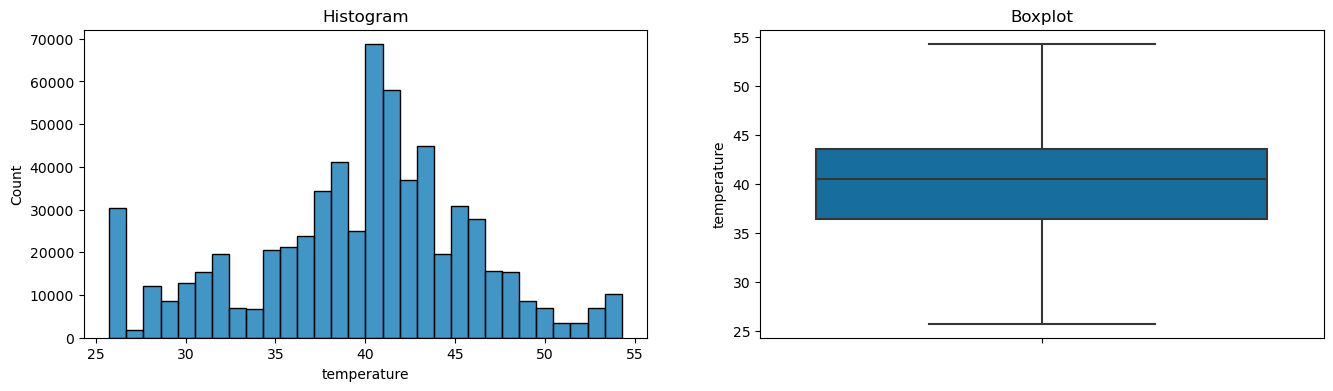


Skewness Value :  -0.318037734891617


In [1007]:
diagnostic_plots(df_ao, 'temperature')
print('\nSkewness Value : ', df_ao['temperature'].skew())

In [1008]:
df_ao.columns

Index(['hour', 'day', 'month', 'source', 'destination', 'cab_type', 'name',
       'price', 'distance', 'surge_multiplier', 'temperature', 'short_summary',
       'precipIntensity', 'humidity', 'windSpeed', 'visibility', 'dewPoint',
       'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'ozone',
       'moonPhase', 'precipIntensityMax'],
      dtype='object')

**KESIMPULAN:** Data yang dihasilkan tidak lagi memiliki outlier dengan menggunakan `winsorizer`

## 6.2 Encoding

The code focuses on encoding categorical variables in a DataFrame to prepare the data for machine learning or statistical analysis. It employs one-hot encoding to convert categorical variables into numerical form.

**Code Explanation**:
1. Identify Categorical Columns:
   - The code identifies categorical variables in the DataFrame `df_ao` using the `select_dtypes` function. It filters columns with data type 'object' and stores their names in the object_column list.

2. Encoding Categorical Variables:
   - A `LabelEncode`r object is instantiated to perform label encoding on categorical columns.
   - A loop iterates through each column in `object_column`, applying label encoding to transform categorical values into numerical representations. The original DataFrame `df_ao` is updated with encoded values.

3. Creating Encoded DataFrame:
   - A new DataFrame `df_encoded` is created as a copy of the updated `df_ao` after categorical columns have been encoded.

4. Display the First Few Rows:
   - The first few rows of the encoded DataFrame are displayed to provide a glimpse of the transformed data.


In [1009]:
df_ao.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy,0.0000,0.68,8.66,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain,0.1299,0.94,11.98,6.086,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,Clear,0.0000,0.75,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,Clear,0.0000,0.73,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,Partly Cloudy,0.0000,0.70,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


In [1010]:
df_ao.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   hour                637976 non-null  int64  
 1   day                 637976 non-null  int64  
 2   month               637976 non-null  int64  
 3   source              637976 non-null  object 
 4   destination         637976 non-null  object 
 5   cab_type            637976 non-null  object 
 6   name                637976 non-null  object 
 7   price               637976 non-null  float64
 8   distance            637976 non-null  float64
 9   surge_multiplier    637976 non-null  float64
 10  temperature         637976 non-null  float64
 11  short_summary       637976 non-null  object 
 12  precipIntensity     637976 non-null  float64
 13  humidity            637976 non-null  float64
 14  windSpeed           637976 non-null  float64
 15  visibility          637976 non-nul

In [1011]:
# Identify categorical variables
object_column = df_ao.select_dtypes(include=['object']).columns.tolist()
object_column

['source', 'destination', 'cab_type', 'name', 'short_summary']

In [1012]:
# calculates the number of unique categories within each of the categorical columns
df_ao[object_column].nunique()

source           12
destination      12
cab_type          2
name             12
short_summary     9
dtype: int64

In [1013]:
# Melakukan encoding terhadap kolom kategori
label_encoder = LabelEncoder()
for col in object_column:
    df_ao[col] = label_encoder.fit_transform(df_ao[col])
    
df_encoded = df_ao.copy()
    
df_encoded.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,5,7,0,7,5.0,0.44,1.0,42.34,4,0.0000,0.68,8.66,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276
1,2,27,11,5,7,0,2,11.0,0.44,1.0,43.58,8,0.1299,0.94,11.98,6.086,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300
2,1,28,11,5,7,0,5,7.0,0.44,1.0,38.33,0,0.0000,0.75,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064
3,4,30,11,5,7,0,4,26.0,0.44,1.0,34.38,0,0.0000,0.73,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000
4,3,29,11,5,7,0,6,9.0,0.44,1.0,37.44,6,0.0000,0.70,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001


In [1014]:
df_encoded.isnull().sum().sum()

0

In [1015]:
df['short_summary'].value_counts().sort_index()

 Clear                 80256
 Drizzle                6725
 Foggy                  8292
 Light Rain            50488
 Mostly Cloudy        134603
 Overcast             201429
 Partly Cloudy        117226
 Possible Drizzle      17176
 Rain                  21781
Name: short_summary, dtype: int64

In [1016]:
df_encoded['short_summary'].value_counts().sort_index()

0     80256
1      6725
2      8292
3     50488
4    134603
5    201429
6    117226
7     17176
8     21781
Name: short_summary, dtype: int64

**KESIMPULAN:** Data yang diproses sudah menjadi numbering secara keseluruhan dan menggunakan `label encoder` untuk memudahkan saat melakukan deploy menggunakan `flask`.

## 6.3 Normalization

## Objective
The objective of this code is to scale the feature matrix (X, X_surge) and the target variable (y, y_surge) using the Robust Scaler. Scaling is an essential preprocessing step in machine learning to ensure that all features contribute equally to the model's training process.


In [1017]:
df_encoded.sample()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
409421,18,18,12,1,8,1,11,10.5,2.56,1.0,30.8,0,0.0,0.41,13.14,9.974,11.545,1010.58,321,0.0,1,376.6,0.37,0.0028


1. **Define Feature Matrix (X) and Target Variable (y):**
   - `X`: The feature matrix, excluding the 'price' column.
   - `y`: The target variable, which is the 'price' column.

In [1018]:
# define the feature matrix X and the target variable y
X = df_encoded.drop(columns='price')
y = df_encoded['price']

In [1019]:
y

0          5.0
1         11.0
2          7.0
3         26.0
4          9.0
          ... 
693065     9.5
693066    13.0
693067     9.5
693069    27.0
693070    10.0
Name: price, Length: 637976, dtype: float64

2. **Initialize Robust Scaler for Features and Target:**
   - Two separate scalers (`scaler_X` and `scaler_y`) are initialized for features and the target variable, respectively.


In [1020]:
# Initialize the Robust Scaler
scaler_X = RobustScaler()
scaler_y = RobustScaler()

3. **Fit and Transform the Data:**
   - The feature matrix (`X`) is fit and transformed using `scaler_X`.
   - The target variable (`y`) is fit and transformed using `scaler_y`.

In [1021]:
# Scale the Data
scaler_X.fit(X)

RobustScaler()

In [1022]:
scaler_y.fit(y.values.reshape(-1, 1))

RobustScaler()

In [1023]:
X_scaled = scaler_X.transform(X)

In [1024]:
y_scaled = scaler_y.transform(y.values.reshape(-1, 1))

4. **Convert to DataFrame:**
   - The scaled feature matrix (`X_scaled`) is converted back to a DataFrame with the original column names.
   - The scaled target variable (`y_scaled`) is flattened to ensure compatibility with some machine learning models.


In [1025]:
# Convert to DataFrame
X = pd.DataFrame(X_scaled, columns=X.columns)

In [1026]:
y = y_scaled.flatten()

In [1027]:
X.shape

(637976, 23)

In [1028]:
# Display the Normalized Data
X.head()

,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,-0.250000,-0.066667,0.0,0.0,0.4,-1.0,0.142857,-1.036145,0.0,0.259467,-1.0,0.0000,-0.125000,0.550,0.076726,0.189087,0.577586,-1.122905,-0.158730,0.0,-0.088020,-0.775510,1.388646
1,-0.833333,0.666667,-1.0,0.0,0.4,-1.0,-0.571429,-1.036145,0.0,0.433380,3.0,0.1299,0.958333,1.214,-2.425831,1.047977,-0.239564,-0.938547,0.285714,0.0,-0.398533,-0.081633,1.414847
2,-0.916667,0.733333,-1.0,0.0,0.4,-1.0,-0.142857,-1.036145,0.0,-0.302945,-5.0,0.0000,0.166667,0.284,0.076726,0.038570,-0.769964,-0.100559,-1.253968,0.0,0.202934,0.000000,1.157205
3,-0.666667,0.866667,-1.0,0.0,0.4,-1.0,-0.285714,-1.036145,0.0,-0.856942,-5.0,0.0000,0.083333,-0.126,0.076726,-0.380997,0.203267,0.290503,-1.301587,0.0,-0.398533,0.142857,-0.004367
4,-0.750000,0.800000,-1.0,0.0,0.4,-1.0,0.000000,-1.036145,0.0,-0.427770,1.0,0.0000,-0.041667,0.646,0.076726,-0.195673,-0.494102,0.251397,-0.603175,0.0,0.985330,0.081633,-0.003275


In [1029]:
# Splitting the Data
X_surge = df_encoded.drop(columns=['price', 'surge_multiplier', 'name', 'distance'])
y_surge = df_encoded['surge_multiplier']

# Initialize the Robust Scaler for Features and Target
scaler_X_surge = RobustScaler()
scaler_y_surge = RobustScaler()

# Fit the Scalers to the Data
scaler_X_surge.fit(X_surge)
scaler_y_surge.fit(y_surge.values.reshape(-1, 1))

# Transform (Scale) the Features and Target
X_surge_scaled = scaler_X_surge.transform(X_surge)
y_surge_scaled = scaler_y_surge.transform(y_surge.values.reshape(-1, 1))

# Convert the Scaled Data back to DataFrame
X_surge = pd.DataFrame(X_surge_scaled, columns=X_surge.columns)
y_surge = y_surge_scaled.flatten()


In [1030]:
X_surge.sample()

,hour,day,month,source,destination,cab_type,temperature,short_summary,precipIntensity,humidity,windSpeed,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
62081,0.5,0.733333,-1.0,0.0,-0.8,-1.0,0.060309,0.0,0.0,-0.291667,0.66,0.076726,-0.105362,-0.818512,0.212291,0.285714,1.0,1.117359,0.081633,-0.004367



### Conclusion
This code provides a standardized and scaled version of the feature matrix (`X`, `X_surge`) and the target variable (`y`, `y_surge`), making it suitable for use in machine learning models that benefit from scaled input data.

## 6.4 Split Data

The code is responsible for splitting the dataset into training and testing sets, a fundamental step in machine learning model development. This separation allows for model training and evaluation on distinct sets of data.

**Code Explanation**:

1. **Split the Data**:
   - The `train_test_split` function from the `sklearn.model_selection` module is used to perform the data split. The function takes the following parameters:
     - `X`: The feature matrix.
     - `y`: The target variable.
     - `test_size`: The proportion of the data to allocate to the testing set. In this case, it's set to 30% (0.3).
     - `random_state`: A seed for the random number generator to ensure reproducibility.

2. **Output**:
   - The result of the data split is four data sets:
     - `X_train`: The feature matrix for the training set.
     - `X_test`: The feature matrix for the testing set.
     - `y_train`: The target variable for the training set.
     - `y_test`: The target variable for the testing set.

In [1031]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [1032]:
# Split the data into training and testing sets
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_surge, y_surge, test_size=0.3, random_state=42)

# 7. PENDEFINISIAN MODEL

**Define the Linear Regression Model**:
   - The code starts by defining a Linear Regression model by initializing the `lr` object as `LinearRegression()`. This step sets up the model for training and prediction.


In [1033]:
# define a Linear Regression model for price
lr = LinearRegression(fit_intercept=True, n_jobs=-1)

In [1034]:
# define a Linear Regression model for Surge_multiplier
lgr = LinearRegression()

# 8. PELATIHAN MODEL

**Model Training**:
   - The Linear Regression model is trained using the `fit` method. The training data, represented by `features` and `target variable`, is used to fit the model to the dataset. This step involves learning the relationship between the features and the target variable.


In [1035]:
# Train the Linear Regression model for price
lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [1036]:
# Train the Linear Regression model for surge_multiplier
lgr.fit(Xs_train, ys_train)

LinearRegression()

# 9. EVALUASI MODEL


**Model Evaluation**:
   - The trained model is used to make predictions on both the training and testing datasets. The predictions for the training set are stored in `y_train_pred`, while the predictions for the testing set are stored in `y_test_pred`.


In [1037]:
# Make predictions on the training and testing datasets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
y_train_pred

array([ 0.95883276,  0.47605424,  0.71387345, ..., -0.34803933,
       -0.38654747,  0.83211685])

In [1038]:
# Make predictions on the training and testing datasets
ys_train_pred = lgr.predict(Xs_train)
ys_test_pred = lgr.predict(Xs_test)
ys_test_pred

array([ 0.03290182, -0.00561809,  0.02685097, ..., -0.00486514,
        0.00024715,  0.00146529])

**Calculate Mean Squared Error (MSE)**:
   - The code calculates the mean squared error (MSE) for both the training and testing predictions. MSE is a common metric used to evaluate regression models. It quantifies the average squared difference between the actual and predicted values.


In [1039]:
# Calculate and print the MSE for both training and testing
print('Hasil error training :',mean_squared_error(y_train_pred, y_train))
print('Hasil error testing : ', mean_squared_error(y_test_pred, y_test))

# Calculate and print the R² score for both training and testing
print('R² score for training:', lr.score(X_train, y_train))
print('R² score for testing:', lr.score(X_test, y_test))

# Inverse transform scaled predictions to original values
y_new = scaler_y.inverse_transform(y_train_pred.reshape(-1, 1))
y_new = y_new.round(2)
y_new

Hasil error training : 0.23187419219890207
Hasil error testing :  0.23096194688098406
R² score for training: 0.5132415312592632
R² score for testing: 0.5174927294343696


array([[26.44],
       [19.93],
       [23.14],
       ...,
       [ 8.8 ],
       [ 8.28],
       [24.73]])

In [1040]:
# Calculate and print the MSE for both training and testing
print('Hasil error training :',mean_squared_error(ys_train_pred, ys_train))
print('Hasil error testing : ', mean_squared_error(ys_test_pred, ys_test))
# Calculate and print the R² score for both training and testing
print('R² score for training:', lgr.score(Xs_train, ys_train))
print('R² score for testing:', lgr.score(Xs_test, ys_test))

# Inverse transform scaled predictions to original values
ys_new = scalar_y_surge.inverse_transform(ys_train_pred.reshape(-1, 1))
ys_new = ys_new.round(2)
ys_new

Hasil error training : 0.008785534638816553
Hasil error testing :  0.009001906694134622
R² score for training: 0.02793109906055702
R² score for testing: 0.02812218844068648


array([[1.  ],
       [1.04],
       [1.03],
       ...,
       [1.  ],
       [1.03],
       [1.04]])

In [1041]:
#save machine learning model
with open('model_price.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

In [1042]:
#save Robust Scalar model
with open('scalar_X.pkl', 'wb') as model_file:
    pickle.dump(scaler_X, model_file)

In [1043]:
#save Robust Scalar model
with open('scalar_y.pkl', 'wb') as model_file:
    pickle.dump(scaler_y, model_file)

hour                  0.000579
day                  -0.003856
month                -0.006434
source                0.012267
destination           0.007659
cab_type              0.175352
name                 -0.840949
distance              0.354334
surge_multiplier      1.514468
temperature           0.001454
short_summary         0.000153
precipIntensity       0.026919
humidity              0.001688
windSpeed             0.000415
visibility           -0.000435
dewPoint             -0.001189
pressure              0.000972
windBearing           0.003130
cloudCover            0.000860
uvIndex              -0.000255
ozone                -0.000015
moonPhase            -0.003962
precipIntensityMax   -0.000599
dtype: float64


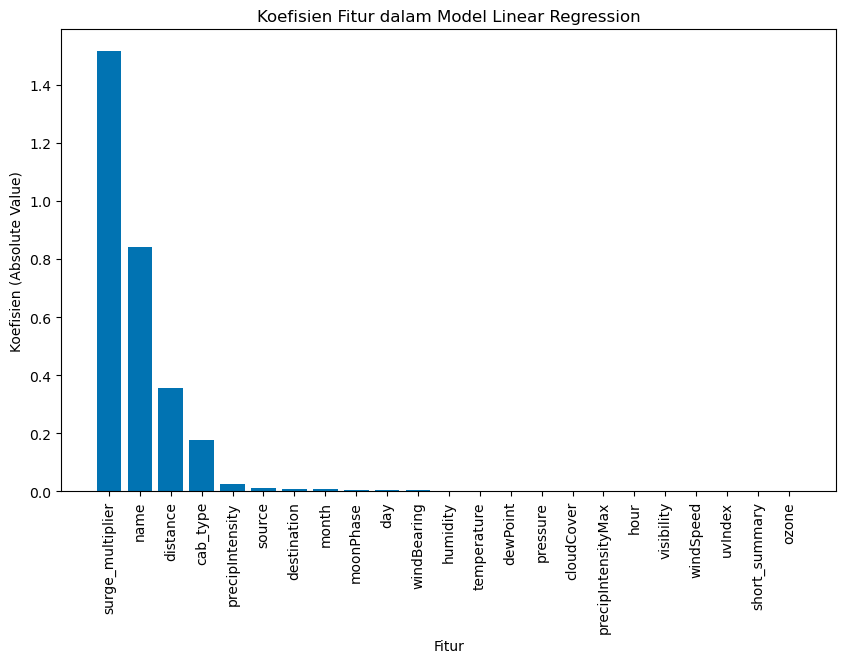

In [1044]:
feature_coefs = pd.Series(lr.coef_, index=X_train.columns)
print(feature_coefs)
sorted_coefs = feature_coefs.abs().sort_values(ascending=False)

# Visualisasi bar plot dari koefisien fitur
plt.figure(figsize=(10, 6))
plt.bar(sorted_coefs.index, sorted_coefs)
plt.xticks(rotation=90)  # Untuk menghindari tumpang tindih label
plt.xlabel("Fitur")
plt.ylabel("Koefisien (Absolute Value)")
plt.title("Koefisien Fitur dalam Model Linear Regression")
plt.show()

hour                 -0.000432
day                  -0.000013
month                 0.000575
source               -0.004596
destination          -0.000332
cab_type             -0.031114
temperature           0.000392
short_summary        -0.000094
precipIntensity      -0.004532
humidity              0.000306
windSpeed            -0.000169
visibility            0.000565
dewPoint             -0.000780
pressure             -0.001646
windBearing           0.000191
cloudCover            0.000124
uvIndex              -0.000481
ozone                -0.000540
moonPhase            -0.000798
precipIntensityMax    0.000517
dtype: float64


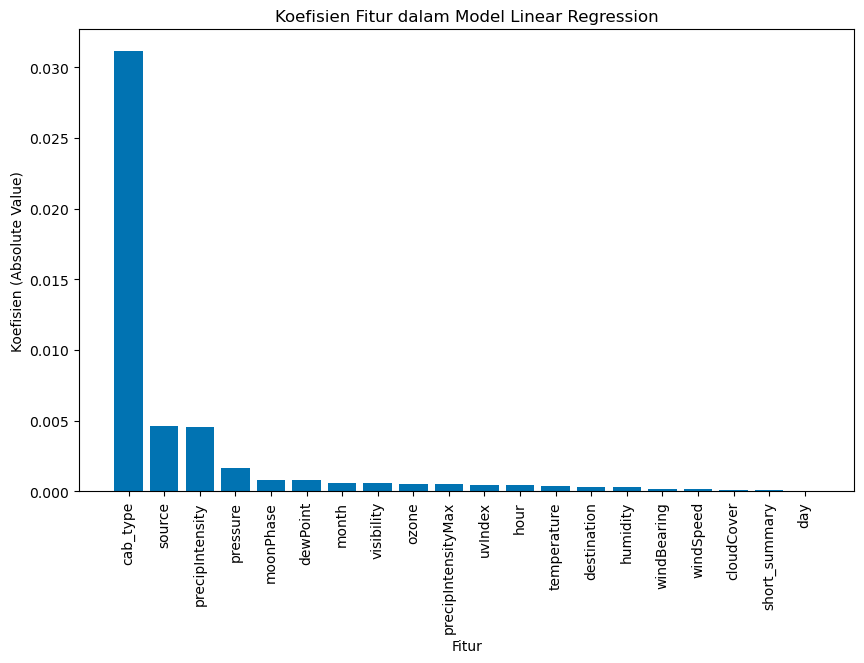

In [1045]:
feature_coefs = pd.Series(lgr.coef_, index=Xs_train.columns)
print(feature_coefs)

sorted_coefs = feature_coefs.abs().sort_values(ascending=False)

# Visualisasi bar plot dari koefisien fitur
plt.figure(figsize=(10, 6))
plt.bar(sorted_coefs.index, sorted_coefs)
plt.xticks(rotation=90)  # Untuk menghindari tumpang tindih label
plt.xlabel("Fitur")
plt.ylabel("Koefisien (Absolute Value)")
plt.title("Koefisien Fitur dalam Model Linear Regression")
plt.show()

**NOTE:** Dari grafik di atas dapat di simpukan bahwa terdapat 5 fitur yang sangat mempengaruhi hasil prediksi yaitu `surge_multiplier`, `name`, `cab_type`, `product_id` dan `distance`

## 9.1 Make a New Model for price

In [1046]:
X_new = df_encoded[['surge_multiplier', 'name', 'cab_type', 'distance', 'short_summary']]
X_new

,surge_multiplier,name,cab_type,distance,short_summary
0,1.0,7,0,0.44,4
1,1.0,2,0,0.44,8
2,1.0,5,0,0.44,0
3,1.0,4,0,0.44,0
4,1.0,6,0,0.44,6
...,...,...,...,...,...
693065,1.0,11,1,1.00,6
693066,1.0,10,1,1.00,6
693067,1.0,9,1,1.00,6
693069,1.0,1,1,1.00,6


In [1047]:
scalar_X_new = RobustScaler()
scalar_X_new.fit(X_new)
X_new_scaled = scalar_X_new.transform(X_new)

In [1048]:
# Convert to DataFrame
X_new = pd.DataFrame(X_new_scaled, columns=X_new.columns)
X_new.head()

,surge_multiplier,name,cab_type,distance,short_summary
0,0.0,0.142857,-1.0,-1.036145,-1.0
1,0.0,-0.571429,-1.0,-1.036145,3.0
2,0.0,-0.142857,-1.0,-1.036145,-5.0
3,0.0,-0.285714,-1.0,-1.036145,-5.0
4,0.0,0.000000,-1.0,-1.036145,1.0


In [1049]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [1050]:
# Train the Linear Regression model
lr.fit(X_train, y_train)

# Make predictions on the training and testing datasets
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Calculate and print the MSE for both training and testing
print('Hasil error training :',mean_squared_error(y_train_pred, y_train))
print('Hasil error testing : ', mean_squared_error(y_test_pred, y_test))

# Calculate and print the R² score for both training and testing
print('R² score for training:', lr.score(X_train, y_train))
print('R² score for testing:', lr.score(X_test, y_test))

Hasil error training : 0.23197300103493496
Hasil error testing :  0.23101834810049113
R² score for training: 0.5130341082715244
R² score for testing: 0.5173749005069276


In [1051]:
#save new machine learning model
with open('model_price.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)
#save new Robust Scalar model
with open('scalar_X.pkl', 'wb') as model_file:
    pickle.dump(scalar_X_new, model_file)

**KESIMPULAN:** Dengan menggunakan 5 fitur yang lebih efesien hasil predict dan score yang di dapatkan tidak jauh berbeda dengan model yang menggunakan 24 fitur.

## 9.2 Make a new model for surge_multiplier

In [1052]:
Xs_new = df_encoded[['cab_type', 'source', 'destination', 'hour', 'temperature', 'short_summary']]
Xs_new

,cab_type,source,destination,hour,temperature,short_summary
0,0,5,7,9,42.34,4
1,0,5,7,2,43.58,8
2,0,5,7,1,38.33,0
3,0,5,7,4,34.38,0
4,0,5,7,3,37.44,6
...,...,...,...,...,...,...
693065,1,11,6,23,37.05,6
693066,1,11,6,23,37.05,6
693067,1,11,6,23,37.05,6
693069,1,11,6,23,37.05,6


In [1053]:
scalar_Xs_new = RobustScaler()
scalar_Xs_new.fit(Xs_new)
Xs_new_scaled = scalar_Xs_new.transform(Xs_new)

# Convert to DataFrame
Xs_new = pd.DataFrame(Xs_new_scaled, columns=Xs_new.columns)
Xs_new.head()

,cab_type,source,destination,hour,temperature,short_summary
0,-1.0,0.0,0.4,-0.250000,0.259467,-1.0
1,-1.0,0.0,0.4,-0.833333,0.433380,3.0
2,-1.0,0.0,0.4,-0.916667,-0.302945,-5.0
3,-1.0,0.0,0.4,-0.666667,-0.856942,-5.0
4,-1.0,0.0,0.4,-0.750000,-0.427770,1.0


In [1054]:
# Split the data into training and testing sets
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_new, y_surge, test_size=0.3, random_state=42)

In [1055]:
# Train the Linear Regression model
lgr.fit(Xs_train, ys_train)

# Make predictions on the training and testing datasets
ys_train_pred = lgr.predict(Xs_train)
ys_test_pred = lgr.predict(Xs_test)

# Calculate and print the MSE for both training and testing
print('Hasil error training :',mean_squared_error(ys_train_pred, ys_train))
print('Hasil error testing : ', mean_squared_error(ys_test_pred, ys_test))

# Calculate and print the R² score for both training and testing
print('R² score for training:', lgr.score(Xs_train, ys_train))
print('R² score for testing:', lgr.score(Xs_test, ys_test))

Hasil error training : 0.008786011314239195
Hasil error testing :  0.009001875564598505
R² score for training: 0.027878357665383935
R² score for testing: 0.028125549295943686


In [1056]:
#save new machine learning model
with open('model_surge.pkl', 'wb') as model_file:
    pickle.dump(lgr, model_file)

#save new Robust Scalar model
with open('scalar_X_surge.pkl', 'wb') as model_file:
    pickle.dump(scalar_Xs_new, model_file)

#save Robust Scalar model
with open('scalar_y_surge.pkl', 'wb') as model_file:
    pickle.dump(scaler_y_surge, model_file)

**KESIMPULAN:** Dengan menggunakan 6 fitur yang lebih efesien hasil predict dan score yang di dapatkan tidak jauh berbeda dengan model yang menggunakan 20 fitur.

# 10. MODEL INFERENCE

1. **DataFrame Generation:** Menghasilkan DataFrame (df_mi) dengan 10 baris data acak sesuai dengan spesifikasi. <br>
2. **Surge Multiplier Prediction:** Menggunakan model (lgr) untuk memprediksi surge_multiplier menggunakan fitur yang sesuai dan melakukan invers transformasi untuk mendapatkan nilai non-skalar.<br>
3. **Price Prediction:** Memilih fitur yang sesuai untuk prediksi harga (predict_price) menggunakan model linear regression (lr). Melakukan invers transformasi untuk mendapatkan nilai non-skalar dan membulatkannya hingga dua desimal.

In [1060]:
# Membuat DataFrame dengan 10 baris
data = {
    'hour': np.random.randint(0, 24, 10),
    'source': np.random.randint(0, 12, 10),
    'destination': np.random.randint(0, 12, 10),
    'name': np.random.randint(0, 12, 10),
    'cab_type': np.random.randint(0, 2, 10),
    'distance': np.random.uniform(0.0, 10.0, 10).round(2),
    'temperature': np.random.uniform(10.0, 30.0, 10).round(2),
    'short_summary': np.random.randint(0, 9, 10)
}

df_mi = pd.DataFrame(data)
df.sample()

,hour,source,destination,name,cab_type,distance,temperature,short_summary
5,19,10,10,3,0,0.42,18.9,2


In [1063]:
# slicing for feature model surge_multiplier
feature_surge = df_mi[['cab_type', 'source', 'destination', 'hour', 'temperature', 'short_summary']]

feature_surge_scalar = scalar_Xs_new.transform(feature_surge)

# predict surge_multiplier
predicted_surge = lgr.predict(feature_surge_scalar)

# Inverse transform to get non-scaled surge
predicted_surge_non_scaled = scalar_y_surge.inverse_transform(predicted_surge.reshape(-1, 1))

# Round the surge multiplier to 2 decimal places
predicted_surge = predicted_surge_non_scaled.round(2)
predicted_surge

array([[1.03],
       [1.03],
       [1.04],
       [1.03],
       [1.  ],
       [1.03],
       [1.03],
       [1.  ],
       [1.  ],
       [1.  ]])

In [1067]:
# Add the surge multiplier to the input data
df_mi['surge_multiplier'] = predicted_surge.flatten()

# Select features for price prediction
feature_price = df_mi[['surge_multiplier', 'name', 'cab_type', 'distance', 'short_summary']]

# Scale the features for price prediction
feature_price_scaled = scalar_X_new.transform(feature_price)
feature_price = pd.DataFrame(feature_price_scaled, columns=feature_price.columns)

# Predict the price
predict_price = lr.predict(feature_price)

# Inverse transform to get non-scaled price
predict_price_non_scaled = scaler_y.inverse_transform(predict_price.reshape(-1, 1))

# Round the price to 2 decimal places
predict_price = predict_price_non_scaled.round(2)
predict_price

array([[36.91],
       [21.06],
       [18.56],
       [18.27],
       [ 9.12],
       [ 8.6 ],
       [24.83],
       [18.57],
       [29.51],
       [23.51]])

### Conclusion
The model inference process involves generating random data for model input, predicting the surge multiplier, adding the predicted surge multiplier to the input data, scaling features for price prediction, and finally predicting the price. The result is a DataFrame (df_mi) with added surge multipliers and predicted prices.

# 11. PENGAMBILAN KESIMPULAN

1. Dengan dataset yang sudah di peroleh kita dapat memprediksi 2 hal yaitu `price` dan `surge_multiplier`
2. Dataset di proses dengan cara :
    - Menghapus kolom yang memiliki korelasi.
    - Mengencode dataset menggunakan `LabelEncoder` agar pada saat deploy tidak memiliki banyak kolom.
    - Menormalisasi dataset menggunakan `RobustScalar`.
3. Model yang dibuat untuk memprediksi `price` dan `surge_multiplier` tersebut menggunakan `Linear Regression`.
    - Hasil prediksi yang di raih sangat bagus untuk ke-2 model prediksi.
4. Melakukan evaluasi model dengan membuat model machine learning baru menggunakan feature yang paling berpengaruh pada model prediksi.
5. Melakukan Model Inference untuk prediksi `price` dan `surge_multiplier` terhadap data yang baru dibuat.
6. Mengekspor semua model yang di perlukan seperti :
    - `scalar_X` dan `scalar_y` untuk menormalisasi data prediksi `price`.
    - `scalar_X_surge` dan `scalar_y_surge` untuk menormalisasi data prediksi `surge_multiplier`.
    - `lr` untuk prediksi `price`.
    - `lgr` untuk memprediksi `surge_multiplier`.
7. Melakukan Deploy model machine learning menggunakan flask dalam bentuk sebuah web.